### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the data sets

In [3]:
#loading the data in data_dictionary file

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows",117)
loan_data_dictionary = pd.read_excel("Data_Dictionary.xlsx")
loan_data_dictionary = loan_data_dictionary.style.set_properties(**{'text-align': 'left'})
loan_data_dictionary = loan_data_dictionary.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
loan_data_dictionary

In [4]:
pd.set_option("display.max_columns",111)
loan = pd.read_csv("loan.csv")
print(loan.shape)
loan.head(3)

(39717, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN

### Cleaning the Data

#### 1.) Treating the columns with more than 60% of the values as null values.

In [5]:
pd.set_option("display.max_columns",111)
loan = pd.read_csv("loan.csv")
print(loan.shape)
loan.head(3)

(39717, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN

In [6]:
# Here we can see around 50% of the attributes (columns) have all values as null values and hence we can remove these columns.
loan.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# Here after removing the coulumns with all the "null" or "na" values we are left with 57 columns and also checked the rows with all null or na values
loan_cleaned = loan.dropna(axis=1,how="all")
loan_cleaned = loan_cleaned.dropna(axis=0,how="all")
print(loan_cleaned.shape)
loan_cleaned.head()

(39717, 57)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

In [8]:
# From above info(loan.isna().sum()) we can see
# mths_since_last_delinq has 64.56% missing values and can be removed as it is very difficult to get any insight from the data with only 35% values
# mths_since_last_record can be removed as 92.89% data is missing data(null values).
# next_pymnt_d can be removed as 97.13% data is missing data(null values).
loan_cleaned = loan_cleaned.drop(columns = ["mths_since_last_delinq","mths_since_last_record"])

In [9]:
print(loan_cleaned.shape)
loan_cleaned.head()

(39717, 55)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

#### 2.) Treating the unwanted columns for our analysis i.e., droping off all the columns that donot provide any insight in our data analysis.

In [10]:
# Loading loan_data_dictionary to understand the attributes(columns) which are not useful for our analysis. 
loan_data_dictionary

In [11]:
print(loan_cleaned.shape)
loan_cleaned.head()

(39717, 55)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

In [12]:
#"pymnt_plan","out_prncp","policy_code","out_prncp_inv","application_type","delinq_amnt","last_pymnt_amnt": 
## These are the columns that can be removed as they donot provide any insight and contain only single or nan values

print("'delinq_amnt' unique values :",loan_cleaned.delinq_amnt.unique())
print("'acc_now_delinq' unique values : ",loan_cleaned.acc_now_delinq.unique())
print("'application_type' unique values :",loan_cleaned.application_type.unique())
print("'policy_code' unique values :",loan_cleaned.policy_code.unique())
print("'pymnt_plan' unique values :",loan_cleaned.pymnt_plan.unique())
print("'chargeoff_within_12_mths' unique values :",loan_cleaned.chargeoff_within_12_mths.unique())
print("'collections_12_mths_ex_med' unique values :",loan_cleaned.collections_12_mths_ex_med.unique())
print("'tax_liens' unique values :",loan_cleaned.tax_liens.unique())
print("'initial_list_status' unique values :",loan_cleaned.initial_list_status.unique())

'delinq_amnt' unique values : [0]
'acc_now_delinq' unique values :  [0]
'application_type' unique values : ['INDIVIDUAL']
'policy_code' unique values : [1]
'pymnt_plan' unique values : ['n']
'chargeoff_within_12_mths' unique values : [ 0. nan]
'collections_12_mths_ex_med' unique values : [ 0. nan]
'tax_liens' unique values : [ 0. nan]
'initial_list_status' unique values : ['f']


In [13]:
# 1.)"pymnt_plan","policy_code","application_type","delinq_amnt","last_pymnt_amnt","acc_now_delinq":
###    removing these columns as they donot provide any insight and only contain single value

# 2.)"total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","delinq_2yrs",
#    "last_pymnt_d","out_prncp","out_prncp_inv","revol_bal","initial_list_status","recoveries"
#     "next_pymnt_d","last_credit_pull_d","collection_recovery_fee","earliest_cr_line":  
###   These are customer behaviour variables and can be ignored as they are not useful in prediting whether the customer will defaut or not

# 3.)"url","zip_code","addr_state": general attributes can be removed

loan_cleaned = loan_cleaned.drop(columns=["pymnt_plan","out_prncp","policy_code","out_prncp_inv","application_type",
                                          "delinq_amnt","last_pymnt_amnt","total_pymnt","total_pymnt_inv","total_rec_prncp",
                                          "total_rec_int","total_rec_late_fee","url","zip_code","addr_state","acc_now_delinq",
                                          "chargeoff_within_12_mths","collections_12_mths_ex_med","tax_liens","delinq_2yrs",
                                          "last_pymnt_d","revol_bal","initial_list_status","recoveries","next_pymnt_d",
                                          "last_credit_pull_d","collection_recovery_fee","earliest_cr_line"])
print(loan_cleaned.shape)
loan_cleaned.head()

(39717, 27)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN   
3                                                                                                                                                                                                                                      

In [14]:
# After analysing the data in columns "title" We can remove them as it is not usefull in our data analysis
loan_cleaned = loan_cleaned.drop(columns="title")

In [15]:
# 32.58% data is missing for "desc", we can drop the column as we cannot get any insight from the column for our analysis.
print(loan_cleaned.desc.size)
print("Total null values in 'desc' :",loan_cleaned.desc.isnull().sum())

39717
Total null values in 'desc' : 12940


In [16]:
(12940/39717)*100

32.58050708764509

In [17]:
loan_cleaned = loan_cleaned.drop(columns="desc")

In [18]:
# looking at the emp_title varible data w.r.t loan_status(here we are considering charged off values for our analysis)
print("'loan_status' unique values :",loan_cleaned.loan_status.unique())

'loan_status' unique values : ['Fully Paid' 'Charged Off' 'Current']


In [19]:
print("charged off")
print(loan_cleaned[loan_cleaned.loan_status == "Charged Off"]["emp_title"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "Charged Off"].shape)
print("\nfully paid")
print(loan_cleaned[loan_cleaned.loan_status == "Fully Paid"]["emp_title"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "Fully Paid"].shape)

charged off
484
(5627, 25)

fully paid
1902
(32950, 25)


In [20]:
# Around 8.6% of coustomer data who has charged off is missing for emp_title attribute
(484/5627)*100

8.601386173804869

In [21]:
# As it is not appropriate to delete 8.6% of the required data,
# hence we can remove the emp_title column as it is not useful in derive the required insight
loan_cleaned = loan_cleaned.drop(columns="emp_title")

In [22]:
print(loan_cleaned.shape)
loan_cleaned.head()

(39717, 24)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4   12.69%        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   Fully Paid     credit_card  27.65   
1     Source Verified  Dec-11  Charged Off             car   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business   8.72   
3     Source Verified  Dec-11   Fully Paid           other  20.00   
4     Source Verified  Dec-11      Current           other  17.94   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
4               0        15        0     53.90%         38   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

#### 3.) Treating the target column.
##### a.)  While droping unwanted columns i observed that traget variable can help us to decide whether to drop the column or to drop the rows based on the percentage of cutomers under charged off category. So treating the target variable to ease our analysis in further cleaning and data analysis.

In [23]:
print(loan_cleaned.shape)
loan_cleaned.head()

(39717, 24)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4   12.69%        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   Fully Paid     credit_card  27.65   
1     Source Verified  Dec-11  Charged Off             car   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business   8.72   
3     Source Verified  Dec-11   Fully Paid           other  20.00   
4     Source Verified  Dec-11      Current           other  17.94   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
4               0        15        0     53.90%         38   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [24]:
# here we can see that the column loan_status is our target variable which containing the information regarding the person 
# has defaulted on the given loan amount or not
loan_cleaned.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [25]:
loan_cleaned.loan_status = loan_cleaned.loan_status.apply(lambda x : x.lower())

In [26]:
# here we can remove the rows where loans_status = current as they are the people who are still paying the loan amount
# and cannot draw any insite from them.
loan_cleaned.loan_status.value_counts()

fully paid     32950
charged off     5627
current         1140
Name: loan_status, dtype: int64

In [27]:
loan_cleaned = loan_cleaned[-(loan_cleaned.loan_status == "current")]
print(loan_cleaned.shape)
loan_cleaned.head()

(38577, 24)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
5               3         9        0     28.30%         12   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

In [28]:
# converting the reamining two categories to "0" and "1" where fully paid is taken as "0" and charged off is taken as "1"
loan_cleaned["loan_status_quantified"] = loan_cleaned.loan_status.apply(lambda x : 0 if x == "fully paid" else 1)
loan_cleaned.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
5               3         9        0     28.30%         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

#### 4.) Treating the remaining data with considerably less percentage of null values.

In [29]:
print(loan_cleaned.shape)
loan_cleaned.head()

(38577, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
5               3         9        0     28.30%         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

In [30]:
 # Here we can see that there are three attributes(columns) with null values.
loan_cleaned.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                1033
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
dti                          0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_util                  50
total_acc                    0
pub_rec_bankruptcies       697
loan_status_quantified       0
dtype: int64

In [31]:
# columns with nulls values
columns_with_nullvalues = []
for i in loan_cleaned.columns:
    if loan_cleaned[i].isnull().sum() != 0:
        columns_with_nullvalues.append(i)
columns_with_nullvalues

['emp_length', 'revol_util', 'pub_rec_bankruptcies']

In [32]:
loan_data_dictionary.data[loan_data_dictionary.data.LoanStatNew.isin(columns_with_nullvalues)]

LoanStatNew  \
19            emp_length   
86  pub_rec_bankruptcies   
91            revol_util   

                                                                                                                           Description  
19  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
86                                                                                                Number of public record bankruptcies  
91          Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

##### a.) emp_length

In [33]:
loan_cleaned

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade emp_length  \
0       36 months   10.65%       162.87     B        B2  10+ years   
1       60 months   15.27%        59.83     C        C4   < 1 year   
2       36 months   15.96%        84.33     C        C5  10+ years   
3       36 months   13.49%       339.31     C        C1  10+ years   
5       36 months    7.90%       156.46     A        A4    3 years   
...           ...      ...          ...   ...       ...        ...   
39712   36 months    8.07%        78.42     A        A4    4 years   
39713   36 months   10.28%       275.38     C        C1    3 years   
39714   36 months    8.07%       156.84     A        A4   < 1 year   
39715   36 months    7.43%       155.38     A        A2   < 1 year   
39716   36 months   13.75%       255.43     E        E2   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
0               RENT     24000.0            Verified  Dec-11   fully paid   
1               RENT     30000.0     Source Verified  Dec-11  charged off   
2               RENT     12252.0        Not Verified  Dec-11   fully paid   
3               RENT     49200.0     Source Verified  Dec-11   fully paid   
5               RENT     36000.0     Source Verified  Dec-11   fully paid   
...              ...         ...                 ...     ...          ...   
39712       MORTGAGE    110000.0        Not Verified  Jul-07   fully paid   
39713           RENT     18000.0        Not Verified  Jul-07   fully paid   
39714       MORTGAGE    100000.0        Not Verified  Jul-07   fully paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07   fully paid   
39716            OWN     22000.0        Not Verified  Jun-07   fully paid   

                  purpose    dti  inq_last_6mths  open_acc  pub_rec  \
0             credit_card  27.65               1         3        0   
1                     car   1.00               5         3        0   
2          small_business   8.72               2         2        0   
3                   other  20.00               1        10        0   
5                 wedding  11.20               3         9        0   
...                   ...    ...             ...       ...      ...   
39712    home_improvement  11.33               0        13        0   
39713         credit_card   6.40               1         6        0   
39714  debt_consolidation   2.30               0        11        0   
39715               other   3.72               0        17        0   
39716  debt_consolidation  14.29               0         7        0   

      revol_util  total_acc  pub_rec_bankruptcies  loan_status_quantified  
0         83.70%          9                   0.0                       0  
1          9.40%          4                   0.0                       1  
2         98.50%         10                   0.0                       0  
3            21%         37                   0.0                       0  
5         28.30%         12                   0.0                       0  
...          ...        ...                   ...                     ...  
39712     13.10%    

In [34]:
loan_cleaned.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [35]:
loan_cleaned.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [36]:
# 228 values i.e., around 4.05% of customer data who has charged off is missing from "emp_length".
# Looking at "emp_length" we see that it is a categorical variable and all the null values can be imputed with mode which is "10+ years"
# or we can decide to remove the missing value data and do the analysis.
print("charged off")
print(loan_cleaned[loan_cleaned.loan_status == "charged off"]["emp_length"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "charged off"].shape)
print("fully paid")
print(loan_cleaned[loan_cleaned.loan_status == "fully paid"]["emp_length"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "fully paid"].shape)

charged off
228
(5627, 25)
fully paid
805
(32950, 25)


In [37]:
print((228/5627)*100, "= null value percentage in charged off customers ")
print((805/32950)*100, "= null value percentage in fully paid customers")

4.051892660387417 = null value percentage in charged off customers 
2.4430955993930197 = null value percentage in fully paid customers


In [38]:
# Here "emp_length" is an important attribute for analysing the custumer behaviour
# we can either impute the data with mode which is "10+ years" or can remove all the rows with null values and proceed for further analysis
# we will do both the cases in analysis phase and can leave the data as it is for now.
# we can remove the rows where loan_status="fully paid" and "emp_length"= nulls values as it is only 1.75% of the data

loan_cleaned = loan_cleaned[-((loan_cleaned.loan_status == "fully paid") & (loan_cleaned.emp_length.isnull()))]
print(loan_cleaned.shape)
loan_cleaned.head()

(37772, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
5               3         9        0     28.30%         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

##### b.) revol_util

In [39]:
print(loan_cleaned.shape)
loan_cleaned.head()

(37772, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc  \
0               1         3        0     83.70%          9   
1               5         3        0      9.40%          4   
2               2         2        0     98.50%         10   
3               1        10        0        21%         37   
5               3         9        0     28.30%         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

In [40]:
print("charged off")
print(loan_cleaned[loan_cleaned.loan_status == "charged off"]["revol_util"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "charged off"].shape)
print("fully paid")
print(loan_cleaned[loan_cleaned.loan_status == "fully paid"]["revol_util"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "fully paid"].shape)

charged off
16
(5627, 25)
fully paid
32
(32145, 25)


In [41]:
# 0.23% of customer data who has charged off is missing from "revol_util" as it is very little data we remove those rows
print((16/5627)*100, "= null value percentage in charged off customers ")
print((32/32145)*100, "= null value percentage in fully paid customers")

0.28434334458859073 = null value percentage in charged off customers 
0.09954891896095815 = null value percentage in fully paid customers


In [42]:
loan_cleaned.revol_util = loan_cleaned.revol_util.apply(lambda x : round(float(str(x).replace("%","")),2))
loan_cleaned = loan_cleaned[-(loan_cleaned.revol_util.isnull())]
print(loan_cleaned.shape)
loan_cleaned.head()

(37724, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
5               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

In [43]:
loan_cleaned.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                227
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_util                  0
total_acc                   0
pub_rec_bankruptcies      697
loan_status_quantified      0
dtype: int64

##### c.) pub_rec_bankruptcies

In [44]:
print(loan_cleaned.shape)
loan_cleaned.head()

(37724, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
5               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

In [45]:
loan_cleaned.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                227
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_util                  0
total_acc                   0
pub_rec_bankruptcies      697
loan_status_quantified      0
dtype: int64

In [46]:
loan_cleaned.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [47]:
loan_cleaned.pub_rec_bankruptcies.value_counts()

0.0    35462
1.0     1560
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [48]:
# 118 values ie around 2.10% of customer data who has charged off is missing from "pub_rec_bankruptcies" data.
print("charged off")
print(loan_cleaned[loan_cleaned.loan_status == "charged off"]["pub_rec_bankruptcies"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "charged off"].shape)
print("\nfully paid")
print(loan_cleaned[loan_cleaned.loan_status == "fully paid"]["pub_rec_bankruptcies"].isnull().sum())
print(loan_cleaned[loan_cleaned.loan_status == "fully paid"].shape)

charged off
118
(5611, 25)

fully paid
579
(32113, 25)


In [49]:
print((118/5610)*100, "= null value percentage in charged off customers ")
print((578/32915)*100, "= null value percentage in fully paid customers")

2.1033868092691623 = null value percentage in charged off customers 
1.7560382804192618 = null value percentage in fully paid customers


In [50]:
# here "pub_rec_bankruptcies" is an important attribute for analysing the data.
# we can either impute the data with mode which is "0" or can remove all the rows with null values and proceed for further analysis.
# we will do both the cases in analysis phase and can leave the data as it is for now.
# we can remove the rows where loan_status="fully paid" and "pub_rec_bankruptcies"= nulls values as it is only 1.75% of the data
loan_cleaned = loan_cleaned[-((loan_cleaned.loan_status == "fully paid") & (loan_cleaned.pub_rec_bankruptcies.isnull()))]
print(loan_cleaned.shape)
loan_cleaned.head()

(37145, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
5    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
5     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
5               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
5                   0.0                       0

### Data Analysis

#### Univariate Analysis & Segmented Univariate Analysis

#### 1.) Analysing categorical variables with target variable

#### a) Handling data types

In [51]:
loan_data_dictionary

In [52]:
loan_analysis = loan_cleaned.reset_index(drop=True)
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4    7.90%       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose    dti  \
0            Verified  Dec-11   fully paid     credit_card  27.65   
1     Source Verified  Dec-11  charged off             car   1.00   
2        Not Verified  Dec-11   fully paid  small_business   8.72   
3     Source Verified  Dec-11   fully paid           other  20.00   
4     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
4                   0.0                       0

In [53]:
loan_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37145 entries, 0 to 37144
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      37145 non-null  int64  
 1   member_id               37145 non-null  int64  
 2   loan_amnt               37145 non-null  int64  
 3   funded_amnt             37145 non-null  int64  
 4   funded_amnt_inv         37145 non-null  float64
 5   term                    37145 non-null  object 
 6   int_rate                37145 non-null  object 
 7   installment             37145 non-null  float64
 8   grade                   37145 non-null  object 
 9   sub_grade               37145 non-null  object 
 10  emp_length              36918 non-null  object 
 11  home_ownership          37145 non-null  object 
 12  annual_inc              37145 non-null  float64
 13  verification_status     37145 non-null  object 
 14  issue_d                 37145 non-null

In [54]:
# coverting "term" and "int_rate" to float for ease of analysis
loan_analysis.term = loan_analysis.term.apply(lambda x: float(re.sub(r"[^0-9]","",str(x))))
loan_analysis.int_rate = loan_analysis.int_rate.apply(lambda x: float(re.sub(r"[\%]","",str(x))))
print(loan_analysis.shape)
loan_analysis.head()

(37145, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
4                   0.0                       0

#### b.) Bucketing the important attributes of customer(numerical variables ex: annual income, interest rate etc) to ease our analysis

In [55]:
print(loan_analysis.shape)
loan_analysis.head()

(37145, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
4                   0.0                       0

In [56]:
# From below data we can see that "funded_amnt_inv"(amount received by borrower) has min value of "0" which is an error,
# as it the amount received by borrower it cannot be "0"
print("loan_amnt\n")
print(loan_analysis.loan_amnt.describe())
print("\nfunded_amnt_inv\n")
print(loan_analysis.funded_amnt_inv.describe())

loan_amnt

count    37145.000000
mean     11139.809530
std       7372.104016
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

funded_amnt_inv

count    37145.000000
mean     10399.455244
std       7015.290546
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14300.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


##### SANITY CHECK FOR THE LOAN AMOUNT

#####  Mathematical Formula for calculating EMI
EMI = [P x R x (1+R)^N]/[(1+R)^N-1], where P stands for the loan amount or principal, R is the interest rate per month [if the interest rate per annum is 11%, then the rate of interest will be 11/(12 x 100)], and N is the number of monthly instalments.

In [57]:
loan_analysis_loan_amount = loan_analysis[["loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment"]]
loan_analysis_loan_amount

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment
0           5000         5000           4975.0  36.0     10.65       162.87
1           2500         2500           2500.0  60.0     15.27        59.83
2           2400         2400           2400.0  36.0     15.96        84.33
3          10000        10000          10000.0  36.0     13.49       339.31
4           5000         5000           5000.0  36.0      7.90       156.46
...          ...          ...              ...   ...       ...          ...
37140       2500         2500            825.0  36.0      9.64        80.26
37141       6500         6500            225.0  36.0     15.01       225.37
37142       1000         1000            950.0  36.0     10.59        32.55
37143       3000         3000            525.0  36.0     11.86        99.44
37144      20000        20000           2800.0  36.0     13.43       678.08

[37145 rows x 6 columns]

In [58]:
for v in ["loan_amnt","funded_amnt","funded_amnt_inv"]:
    r = (loan_analysis_loan_amount.int_rate/(12*100))
    n = loan_analysis_loan_amount.term
    p = loan_analysis_loan_amount[v]
    pos = ["loan_amnt","funded_amnt","funded_amnt_inv"]
    names = ["installments_for_loan_amount","installments_for_funded_amnt","installments_for_funded_amnt_inv"]
    l_emi = []
    for i in range(loan_analysis_loan_amount.shape[0]):       
        x =np.math.pow((1+r[i]),n[i])
        num = (p[i]*r[i]*x)
        deno = (x-1)
        emi_value = round((num/deno),2)
        l_emi.append(emi_value)
    loan_analysis_loan_amount[names[pos.index(v)]] = l_emi

In [59]:
loan_analysis_loan_amount

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0  36.0     10.65       162.87   
1           2500         2500           2500.0  60.0     15.27        59.83   
2           2400         2400           2400.0  36.0     15.96        84.33   
3          10000        10000          10000.0  36.0     13.49       339.31   
4           5000         5000           5000.0  36.0      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
37140       2500         2500            825.0  36.0      9.64        80.26   
37141       6500         6500            225.0  36.0     15.01       225.37   
37142       1000         1000            950.0  36.0     10.59        32.55   
37143       3000         3000            525.0  36.0     11.86        99.44   
37144      20000        20000           2800.0  36.0     13.43       678.08   

       installments_for_loan_amount  installments_for_funded_amnt  \
0                            162.87                        162.87   
1                             59.83                         59.83   
2                             84.33                         84.33   
3                            339.30                        339.30   
4                            156.45                        156.45   
...                             ...                           ...   
37140                         80.25                         80.25   
37141                        225.36                        225.36   
37142                         32.54                         32.54   
37143                         99.44                         99.44   
37144                        678.03                        678.03   

       installments_for_funded_amnt_inv  
0                                162.05  
1                                 59.83  
2                                 84.33  
3                                339.30  
4                                156.45  
...                                 ...  
37140                             26.48  
37141                              7.80  
37142                             30.92  
37143                             17.40  
37144                             94.92  

[37145 rows x 9 columns]

In [60]:
c = ["installment","installments_for_loan_amount","installments_for_funded_amnt","installments_for_funded_amnt_inv"]
for i in c:
    pos = ["installment","installments_for_loan_amount","installments_for_funded_amnt","installments_for_funded_amnt_inv"]
    names = ["installment_floor","installments_for_loan_amount_floor","installments_for_funded_amnt_floor","installments_for_funded_amnt_inv_floor"]
    loan_analysis_loan_amount[names[pos.index(i)]] = loan_analysis_loan_amount[i].apply(lambda x : np.floor(x))
loan_analysis_loan_amount

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0  36.0     10.65       162.87   
1           2500         2500           2500.0  60.0     15.27        59.83   
2           2400         2400           2400.0  36.0     15.96        84.33   
3          10000        10000          10000.0  36.0     13.49       339.31   
4           5000         5000           5000.0  36.0      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
37140       2500         2500            825.0  36.0      9.64        80.26   
37141       6500         6500            225.0  36.0     15.01       225.37   
37142       1000         1000            950.0  36.0     10.59        32.55   
37143       3000         3000            525.0  36.0     11.86        99.44   
37144      20000        20000           2800.0  36.0     13.43       678.08   

       installments_for_loan_amount  installments_for_funded_amnt  \
0                            162.87                        162.87   
1                             59.83                         59.83   
2                             84.33                         84.33   
3                            339.30                        339.30   
4                            156.45                        156.45   
...                             ...                           ...   
37140                         80.25                         80.25   
37141                        225.36                        225.36   
37142                         32.54                         32.54   
37143                         99.44                         99.44   
37144                        678.03                        678.03   

       installments_for_funded_amnt_inv  installment_floor  \
0                                162.05              162.0   
1                                 59.83               59.0   
2                                 84.33               84.0   
3                                339.30              339.0   
4                                156.45              156.0   
...                                 ...                ...   
37140                             26.48               80.0   
37141                              7.80              225.0   
37142                             30.92               32.0   
37143                             17.40               99.0   
37144                             94.92              678.0   

       installments_for_loan_amount_floor  installments_for_funded_amnt_floor  \
0                                   162.0                               162.0   
1                                    59.0                                59.0   
2                                    84.0                                84.0   
3                                   339.0                               339.0   
4                                   156.0                               156.0   
...                                   ...                                 ...   
37140                                80.0                                80.0   
37141                               225.0                               225.0   
37142                                32.0                                32.0   
37143                                99.0                                99.0   
37144                               678.0                               678.0   

       installments_for_funded_amnt_inv_floor  
0                                       162.0  
1                                        59.0  
2                                        84.0  
3                                       339.0  
4                                       156.0  
...                                       ...  
37140                                    26.0  
37141                                     7.0  
37142                                    30.0  
37143                          

In [61]:
# calculating EMI with "loan_amount", "funded_amnt", "funded_amnt_inv" and checking it with the installs(without ignoring the decimals)
print("loan_analysis_loan_amount.installments_for_loan_amount==loan_analysis_loan_amount.installment")
print(loan_analysis_loan_amount[loan_analysis_loan_amount.installments_for_loan_amount==loan_analysis_loan_amount.installment].shape)
print("\nloan_analysis_loan_amount.installments_for_funded_amnt==loan_analysis_loan_amount.installment")
print(loan_analysis_loan_amount[loan_analysis_loan_amount.installments_for_funded_amnt==loan_analysis_loan_amount.installment].shape)
print("\nloan_analysis_loan_amount.installments_for_funded_amnt_inv==loan_analysis_loan_amount.installment")
print(loan_analysis_loan_amount[loan_analysis_loan_amount.installments_for_funded_amnt_inv==loan_analysis_loan_amount.installment].shape)

loan_analysis_loan_amount.installments_for_loan_amount==loan_analysis_loan_amount.installment
(16527, 13)

loan_analysis_loan_amount.installments_for_funded_amnt==loan_analysis_loan_amount.installment
(17388, 13)

loan_analysis_loan_amount.installments_for_funded_amnt_inv==loan_analysis_loan_amount.installment
(9311, 13)


In [62]:
# calculating EMI with "loan_amount", "funded_amnt", "funded_amnt_inv" and checking it with the installs(with ignoring the decimals)
print("loan_analysis_loan_amount.installments_for_loan_amount_floor==loan_analysis_loan_amount.installment_floor")
print(loan_analysis_loan_amount[loan_analysis_loan_amount.installments_for_loan_amount_floor==loan_analysis_loan_amount.installment_floor].shape)
print("\nloan_analysis_loan_amount.installments_for_funded_amnt_floor==loan_analysis_loan_amount.installment_floor")
print(loan_analysis_loan_amount[loan_analysis_loan_amount.installments_for_funded_amnt_floor==loan_analysis_loan_amount.installment_floor].shape)
print("\nloan_analysis_loan_amount.installments_for_funded_amnt_inv_floor==loan_analysis_loan_amount.installment_floor")
print(loan_analysis_loan_amount[loan_analysis_loan_amount.installments_for_funded_amnt_inv_floor==loan_analysis_loan_amount.installment_floor].shape)

loan_analysis_loan_amount.installments_for_loan_amount_floor==loan_analysis_loan_amount.installment_floor
(35220, 13)

loan_analysis_loan_amount.installments_for_funded_amnt_floor==loan_analysis_loan_amount.installment_floor
(36933, 13)

loan_analysis_loan_amount.installments_for_funded_amnt_inv_floor==loan_analysis_loan_amount.installment_floor
(20129, 13)


In [63]:
# Here after calculating EMI on loan_amnt, funded_amnt, funded_amnt_inv and comparing it with the installment column.
# We can see loan_amnt, funded_amnt are more reliable than funded_amnt_inv.
# Hence we can consider either loan_amnt or funded_amnt instead of funded_amnt_inv.
# we can take loan_amnt for our analysis this would not change our analysis as in most of the cases loan_amnt and funded_amnt values are close to each other and also loan_amnt is the money requested by the customer.
print(loan_analysis.shape)
loan_analysis.head()

(37145, 25)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified  
0                   0.0                       0  
1                   0.0                       1  
2                   0.0                       0  
3                   0.0                       0  
4                   0.0                       0

In [64]:
# Bucketing loan_amnt into 10 and 4 equal parts so that we understand the how different sizes of loan amount can derive any insights 
loan_analysis["loan_amnt_segmented_10"] = pd.qcut(loan_analysis.loan_amnt, q=10)
loan_analysis["loan_amnt_segmented_4"] = pd.qcut(loan_analysis.loan_amnt, q=4, labels=(["Low (500.0, 5500.0]","Medium (5500.0, 10000.0]","High (10000.0, 15000.0]", "V High (15000.0, 35000.0]"]))

# Bucketing inn_rate
loan_analysis["int_rate_segmented_4"] = pd.qcut(loan_analysis.int_rate, q=4, labels=(["Low (5.419, 8.94]","Medium (8.94, 11.83]","High (11.83, 14.46]", "V High (14.46, 24.4]"]))

# Bucketing open_acc
loan_analysis["open_acc_segmented_5"] = pd.qcut(loan_analysis.open_acc, q=5, labels=(["V Low (1.999, 6.0]","Low (6.0, 8.0]","Medium (8.0, 10.0]","High (10.0, 13.0]", "V High (13.0, 44.0]"]))

# Bucketing dti
loan_analysis["dti_segmented_5"] = pd.qcut(loan_analysis.dti, q=5, labels=(["V Low [0, 7.03]","Low (7.03, 11.42]","Medium (11.42, 15.378]","High (15.378, 19.75]", "V High (19.75, 29.99]"]))

# Bucketing revol_util
loan_analysis["revol_util_segmented_5"] = pd.qcut(loan_analysis.revol_util, q=5, labels=(["V Low [0, 20.3]","Low (20.3, 40.3]","Medium (40.3, 58.5]","High (58.5, 77.5]", "V High (77.5, 99.9]"]))

# Bucketing total_acc
loan_analysis["total_acc_segmented_5"] = pd.qcut(loan_analysis.total_acc, q=5, labels=(["V Low (1.999, 12.0]","Low (12.0, 18.0]","Medium (18.0, 23.0]","High (23.0, 31.0]", "V High (31.0, 90.0]"]))

# Bucketing installment
loan_analysis["installment_segmented_5"] = pd.qcut(loan_analysis.installment, q=5, labels=(["V Low [16.08, 151.42]","Low (151.42, 231.084]","Medium (231.084, 330.538]","High (330.538, 482.92]", "V High (482.92, 1305.19]"]))
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5  
0   Low (151.42, 231.084]  
1   V Low [16.08, 151.42]  
2   V Low [16.08, 151.42]  
3  High (330.538, 482.92]  
4   Low (151.42, 231.084]

In [65]:
# Bucketing annual_inc
print(loan_analysis.shape)
loan_analysis.head()

(37145, 33)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5  
0   Low (151.42, 231.084]  
1   V Low [16.08, 151.42]  
2   V Low [16.08, 151.42]  
3  High (330.538, 482.92]  
4   Low (151.42, 231.084]

In [66]:
loan_analysis.annual_inc.describe()

count    3.714500e+04
mean     6.926541e+04
std      6.391432e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

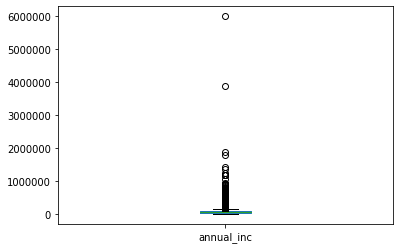

In [67]:
# Here we can see that there few outliers
# But as it is a salary variable we can ignore these outliers and proceed with our analysis
loan_analysis.annual_inc.plot(kind="box")

In [68]:
loan_analysis["annual_inc_segmented_5"] = pd.qcut(loan_analysis.annual_inc,q=5,labels=(["V Low (3999.999, 38000.0]","Low (38000.0, 51000.0]","Medium (51000.0, 66000.0]","High (66000.0, 90000.0]", "V High (90000.0, 6000000.0]"]))
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5  
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]  
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
3  High (330.538, 482.92]     Low (38000.0, 51000.0]  
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]

#### c.) Plotting the categorical variables with target variable

In [69]:
print(loan_analysis.shape)
loan_analysis.head()

(37145, 34)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5  
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]  
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
3  High (330.538, 482.92]     Low (38000.0, 51000.0]  
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]

In [70]:
loan_analysis.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies',
 'loan_status_quantified',
 'loan_amnt_segmented_10',
 'loan_amnt_segmented_4',
 'int_rate_segmented_4',
 'open_acc_segmented_5',
 'dti_segmented_5',
 'revol_util_segmented_5',
 'total_acc_segmented_5',
 'installment_segmented_5',
 'annual_inc_segmented_5']

In [71]:
# listing all the important variables for analysis
attributes = ['term',
             'home_ownership',
             'verification_status',
             'purpose',
             'inq_last_6mths',
             'pub_rec',
             'loan_amnt_segmented_10',
             'loan_amnt_segmented_4',
             'int_rate_segmented_4',
             'open_acc_segmented_5',
             'dti_segmented_5',
             'revol_util_segmented_5',
             'total_acc_segmented_5',
             'installment_segmented_5',
             'annual_inc_segmented_5']

In [72]:
# Function for annotating the bar's in a bar graph
def annotate(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),  
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center', 
                       size=10, xytext=(0, 6), 
                       textcoords='offset points')

##### "Plot showing percentage of customers defaulting for given category"

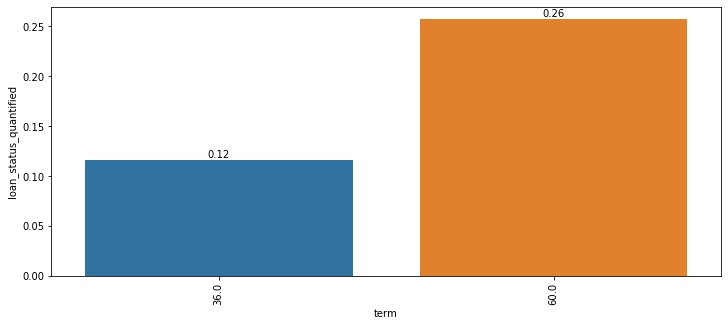

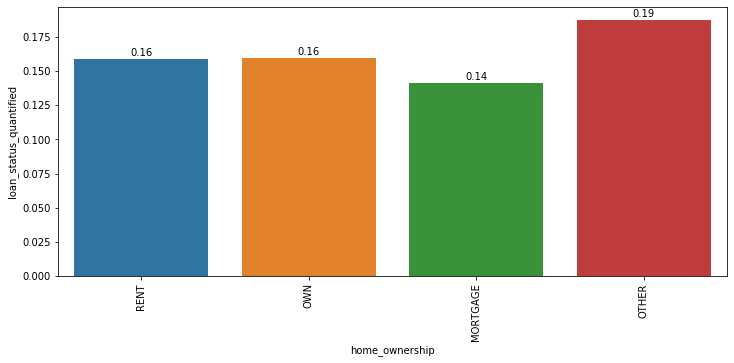

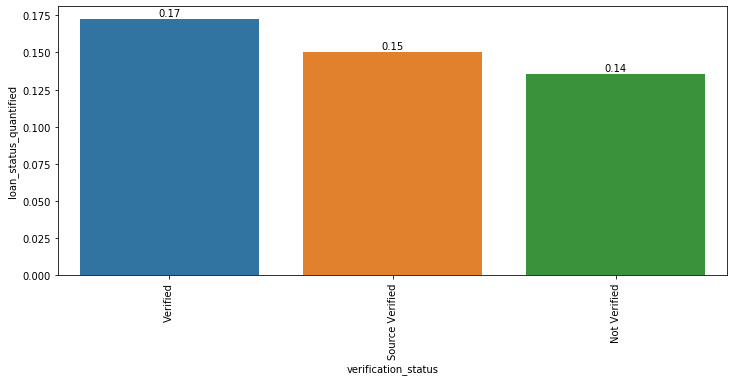

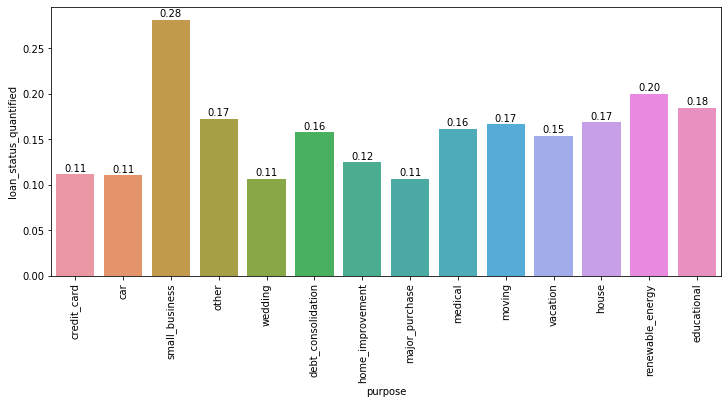

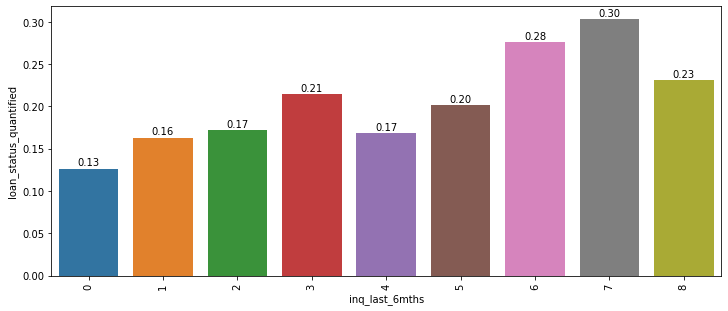

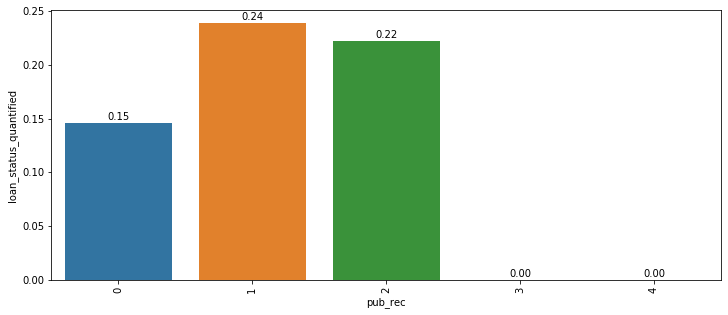

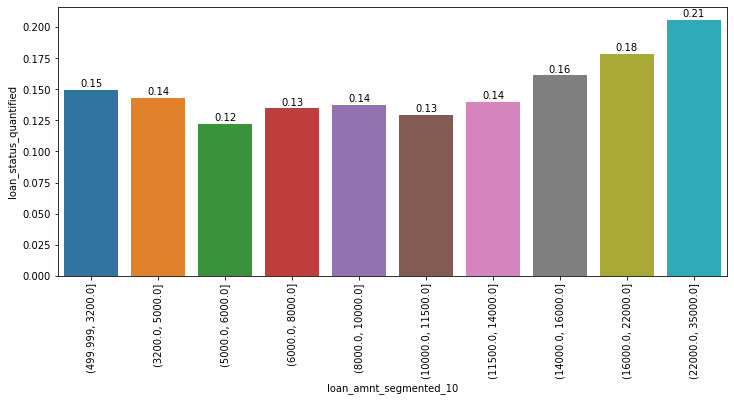

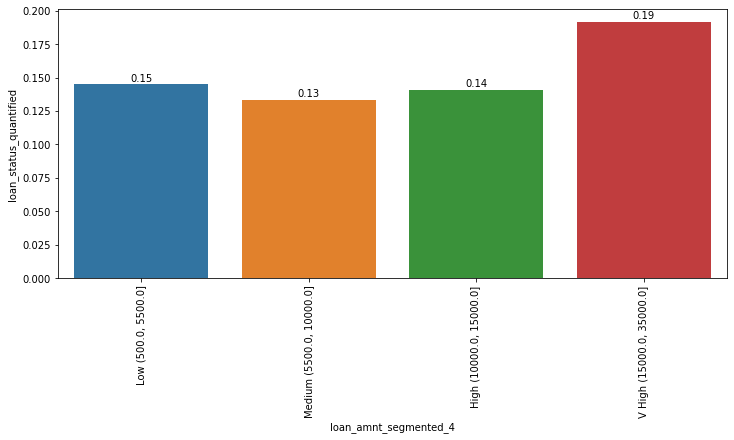

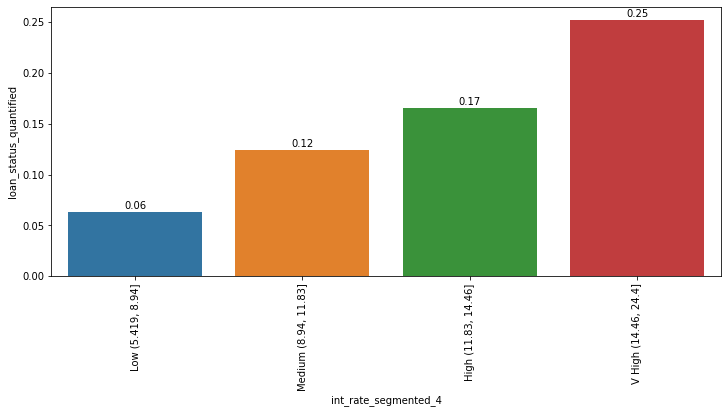

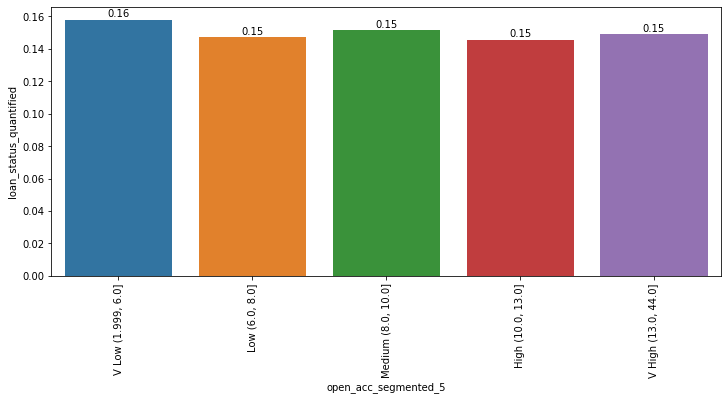

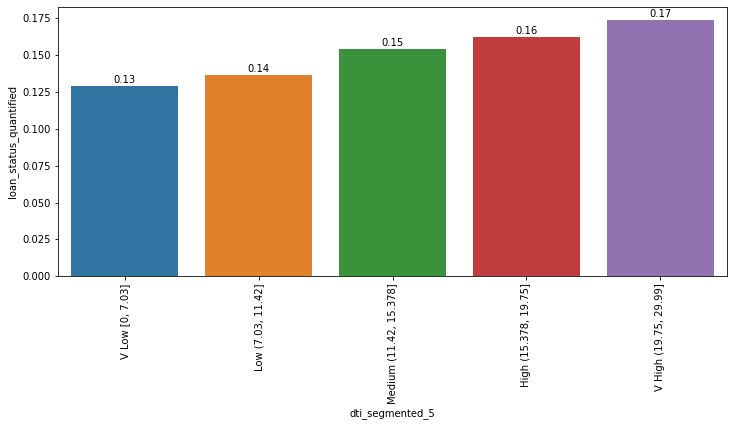

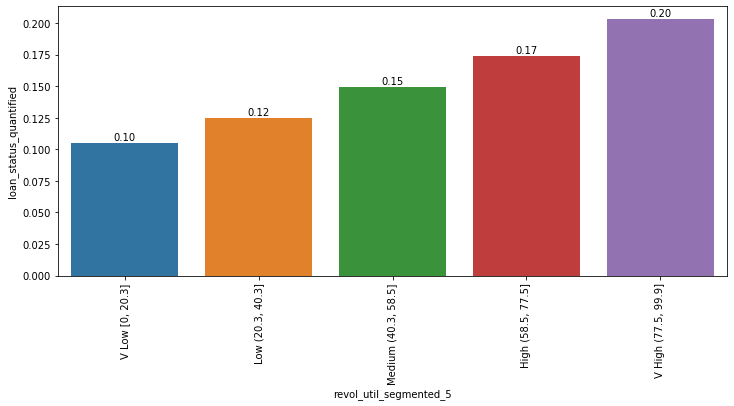

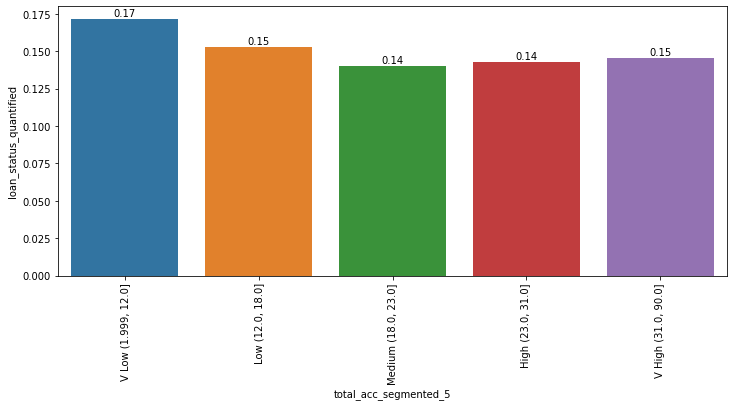

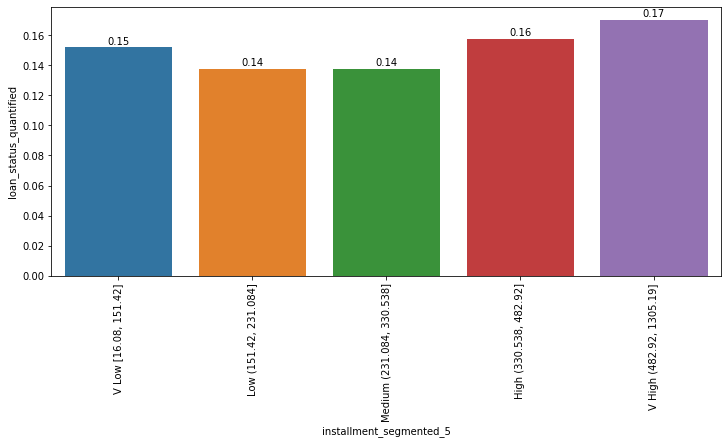

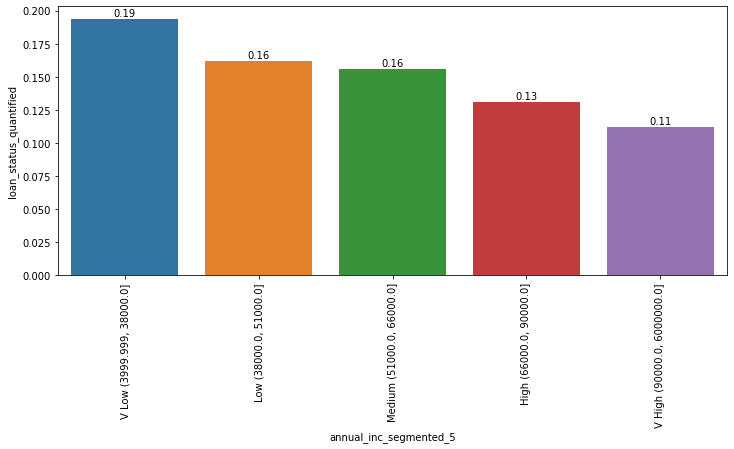

In [73]:
# "Plot showing percentage of customers defaulting for given category"
for i, v in enumerate(attributes):
    plt.figure(figsize= (12,100))
    plt.subplot(17,1,i+1)
    plots = sns.barplot(loan_analysis[v],loan_analysis.loan_status_quantified,ci = None)
    annotate(plots)
    plt.xticks(rotation = 90)
    plt.show()

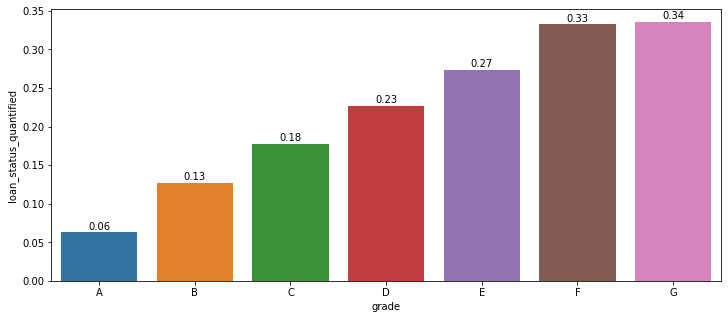

In [74]:
#Analysis grade and sub_grade categories
plt.figure(figsize= (12,5))
plots = sns.barplot(loan_analysis.grade,loan_analysis.loan_status_quantified,ci = None,order=sorted(loan_analysis.grade.unique().tolist()))
annotate(plots)
plt.show()

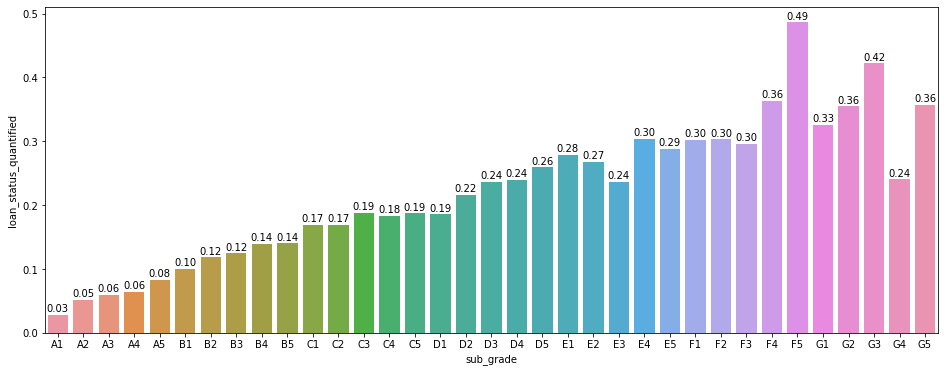

In [75]:
plt.figure(figsize= (16,6))
plots = sns.barplot(loan_analysis.sub_grade,loan_analysis.loan_status_quantified,ci = None,order=sorted(loan_analysis.sub_grade.unique().tolist()))
annotate(plots)
plt.show()

In [76]:
# Analysing emp_length without imputing mode values & with imputing mode value
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5  
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]  
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
3  High (330.538, 482.92]     Low (38000.0, 51000.0]  
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]

In [77]:
# Imputing the mode value to emp_length
loan_analysis_emp_length = loan_analysis[["emp_length","loan_status_quantified"]]
loan_analysis_emp_length.head()

emp_length  loan_status_quantified
0  10+ years                       0
1   < 1 year                       1
2  10+ years                       0
3  10+ years                       0
4    3 years                       0

In [78]:
print("Null Values in loan_analysis_emp_length\n")
print(loan_analysis_emp_length.isnull().sum())
print("\nMode value in emp_length is =", loan_analysis_emp_length.emp_length.mode()[0])

Null Values in loan_analysis_emp_length

emp_length                227
loan_status_quantified      0
dtype: int64

Mode value in emp_length is = 10+ years


In [79]:
loan_analysis_emp_length = loan_analysis_emp_length.fillna(loan_analysis_emp_length.emp_length.mode()[0])

In [80]:
# All null values are replaced by mode value
loan_analysis_emp_length.fillna(loan_analysis_emp_length.emp_length.mode()[0]).emp_length.isnull().sum()

0

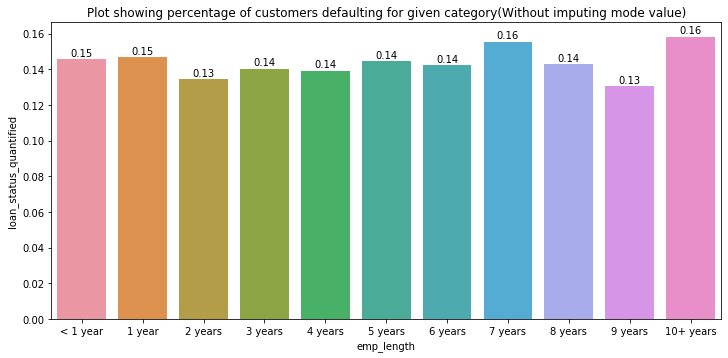

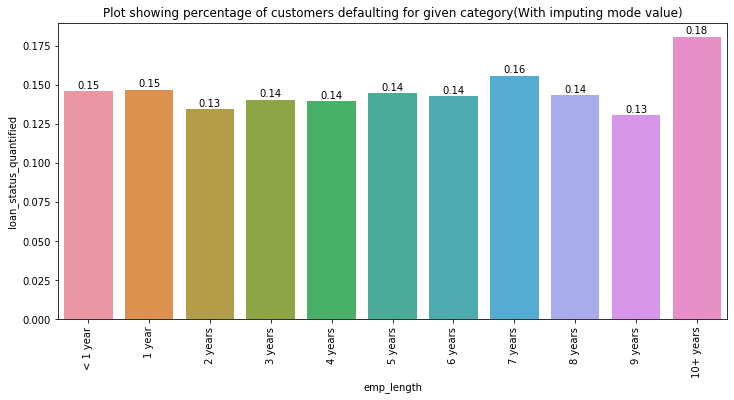

In [81]:
# Here we can observe that imputing the null values with mode(10+ years) doesnt have any significant effect on our analysis
# and our over all inference will remain same.

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("Plot showing percentage of customers defaulting for given category(Without imputing mode value)")
plots = sns.barplot(loan_analysis.emp_length,loan_analysis.loan_status_quantified,order=[ '< 1 year', '1 year', '2 years','3 years', '4 years', '5 years','6 years', '7 years','8 years', '9 years',
'10+ years'],ci=None)
annotate(plots)
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
plt.title("Plot showing percentage of customers defaulting for given category(With imputing mode value)")
plots = sns.barplot(loan_analysis_emp_length.emp_length,loan_analysis_emp_length.loan_status_quantified,order=[ '< 1 year', '1 year', '2 years','3 years', '4 years', '5 years','6 years', '7 years','8 years', '9 years',
'10+ years'],ci=None)
annotate(plots)
plt.xticks(rotation = 90)
plt.show()

In [82]:
# We can also bucket these values and gain the insights accordingly
loan_analysis_emp_length["emp_length_type_int"] = loan_analysis_emp_length.emp_length.apply(lambda x: 0 if str(x)=="< 1 year" else int(re.sub(r"[^0-9]","",str(x))))
loan_analysis_emp_length["emp_length_type_int_segmented"] = pd.qcut(loan_analysis_emp_length.emp_length_type_int,q=3)
loan_analysis_emp_length

emp_length  loan_status_quantified  emp_length_type_int  \
0      10+ years                       0                   10   
1       < 1 year                       1                    0   
2      10+ years                       0                   10   
3      10+ years                       0                   10   
4        3 years                       0                    3   
...          ...                     ...                  ...   
37140   < 1 year                       1                    0   
37141    9 years                       1                    9   
37142    2 years                       1                    2   
37143    2 years                       0                    2   
37144    6 years                       1                    6   

      emp_length_type_int_segmented  
0                       (7.0, 10.0]  
1                     (-0.001, 3.0]  
2                       (7.0, 10.0]  
3                       (7.0, 10.0]  
4                     (-0.001, 3.0]  
...                             ...  
37140                 (-0.001, 3.0]  
37141                   (7.0, 10.0]  
37142                 (-0.001, 3.0]  
37143                 (-0.001, 3.0]  
37144                    (3.0, 7.0]  

[37145 rows x 4 columns]

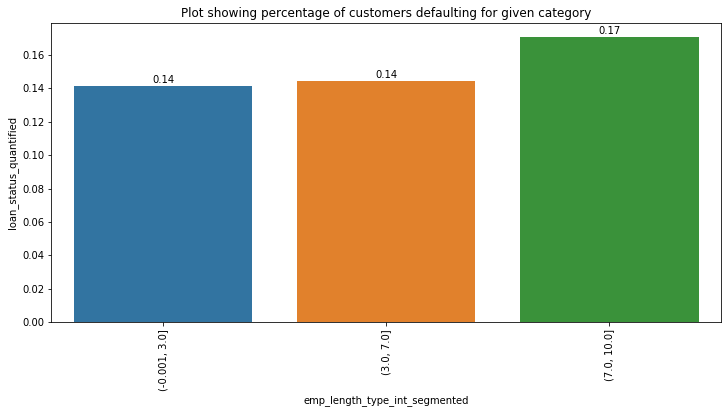

In [83]:
plt.figure(figsize=(12,5.5))
plt.title("Plot showing percentage of customers defaulting for given category")
plots = sns.barplot(loan_analysis_emp_length.emp_length_type_int_segmented,loan_analysis_emp_length.loan_status_quantified,ci=None)
annotate(plots)
plt.xticks(rotation = 90)
plt.show()

In [84]:
# Analysing pub_rec_bankruptcies without imputing mode values & with imputing mode value
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5  
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]  
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
3  High (330.538, 482.92]     Low (38000.0, 51000.0]  
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]

In [85]:
# Imputing the mode value to emp_length
loan_analysis_pub_rec_bankruptcies = loan_analysis[["pub_rec_bankruptcies","loan_status_quantified"]]
loan_analysis_pub_rec_bankruptcies.head()

pub_rec_bankruptcies  loan_status_quantified
0                   0.0                       0
1                   0.0                       1
2                   0.0                       0
3                   0.0                       0
4                   0.0                       0

In [86]:
print("Null Values in loan_analysis_pub_rec_bankruptcies\n")
print(loan_analysis_pub_rec_bankruptcies.isnull().sum())
print("\nMode value in pub_rec_bankruptcies is =", loan_analysis_pub_rec_bankruptcies.pub_rec_bankruptcies.mode()[0])

Null Values in loan_analysis_pub_rec_bankruptcies

pub_rec_bankruptcies      118
loan_status_quantified      0
dtype: int64

Mode value in pub_rec_bankruptcies is = 0.0


In [87]:
loan_analysis_pub_rec_bankruptcies = loan_analysis_pub_rec_bankruptcies.fillna(loan_analysis_pub_rec_bankruptcies.pub_rec_bankruptcies.mode()[0])

In [88]:
# All null values are replaced by mode value
loan_analysis_pub_rec_bankruptcies.fillna(loan_analysis_pub_rec_bankruptcies.pub_rec_bankruptcies.mode()[0]).pub_rec_bankruptcies.isnull().sum()

0

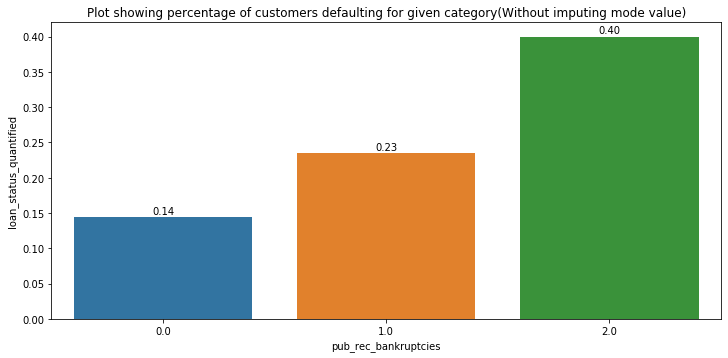

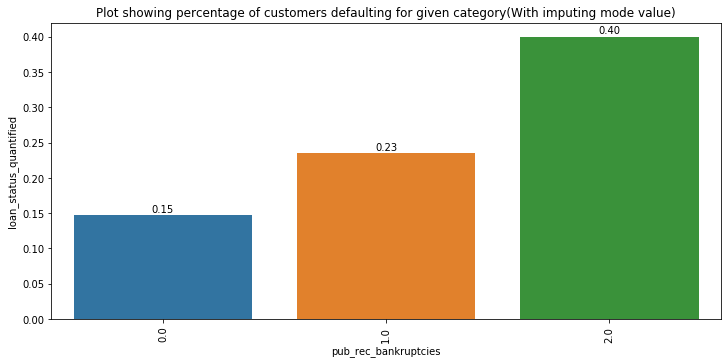

In [89]:
# Here we can observe that imputing the null values with mode("0") doesnt have any significant effect on our analysis
# and our over all inference for pub_rec_bankruptcies will remain same.

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("Plot showing percentage of customers defaulting for given category(Without imputing mode value)")
plots = sns.barplot(loan_analysis.pub_rec_bankruptcies,loan_analysis.loan_status_quantified,ci=None)
annotate(plots)
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
plt.title("Plot showing percentage of customers defaulting for given category(With imputing mode value)")
plots = sns.barplot(loan_analysis_pub_rec_bankruptcies.pub_rec_bankruptcies,loan_analysis_pub_rec_bankruptcies.loan_status_quantified,ci=None)
annotate(plots)
plt.xticks(rotation = 90)
plt.show()

In [90]:
# Analysis issue_d
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5  
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]  
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]  
3  High (330.538, 482.92]     Low (38000.0, 51000.0]  
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]

In [91]:
pd.to_datetime(loan_analysis.issue_d, format= "%b-%y")

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
37140   2007-08-01
37141   2007-08-01
37142   2007-08-01
37143   2007-08-01
37144   2007-08-01
Name: issue_d, Length: 37145, dtype: datetime64[ns]

In [92]:
# Deriving months and years from issue_d
loan_analysis["issue_d_month"] = loan_analysis.issue_d.apply(lambda x : str(re.sub(r"[^a-zA-Z]","",x)))
loan_analysis["issue_d_year"] = pd.to_datetime(loan_analysis.issue_d, format= "%b-%y").apply(lambda x : x.year)
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5 issue_d_month  \
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]           Dec   
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]           Dec   
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]           Dec   
3  High (330.538, 482.92]     Low (38000.0, 51000.0]           Dec   
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]           Dec   

   issue_d_year  
0          2011  
1          2011  
2          2011  
3          2011  
4          2011

In [93]:
loan_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37145 entries, 0 to 37144
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       37145 non-null  int64   
 1   member_id                37145 non-null  int64   
 2   loan_amnt                37145 non-null  int64   
 3   funded_amnt              37145 non-null  int64   
 4   funded_amnt_inv          37145 non-null  float64 
 5   term                     37145 non-null  float64 
 6   int_rate                 37145 non-null  float64 
 7   installment              37145 non-null  float64 
 8   grade                    37145 non-null  object  
 9   sub_grade                37145 non-null  object  
 10  emp_length               36918 non-null  object  
 11  home_ownership           37145 non-null  object  
 12  annual_inc               37145 non-null  float64 
 13  verification_status      37145 non-null  object  
 14  issue_

In [94]:
loan_analysis["issue_d_year"] = pd.to_datetime(loan_analysis.issue_d, format= "%b-%y").apply(lambda x : x.year)
loan_analysis.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
37140  118533     117783       2500         2500            825.0  36.0   
37141  118523     118519       6500         6500            225.0  36.0   
37142  113179     113093       1000         1000            950.0  36.0   
37143  112496     112493       3000         3000            525.0  36.0   
37144  111227     111223      20000        20000           2800.0  36.0   

       int_rate  installment grade sub_grade emp_length home_ownership  \
37140      9.64        80.26     B        B4   < 1 year       MORTGAGE   
37141     15.01       225.37     F        F1    9 years       MORTGAGE   
37142     10.59        32.55     C        C2    2 years       MORTGAGE   
37143     11.86        99.44     D        D1    2 years       MORTGAGE   
37144     13.43       678.08     E        E1    6 years       MORTGAGE   

       annual_inc verification_status issue_d  loan_status  \
37140     75000.0        Not Verified  Aug-07  charged off   
37141    213000.0        Not Verified  Aug-07  charged off   
37142     33990.0        Not Verified  Aug-07  charged off   
37143     36153.0        Not Verified  Aug-07   fully paid   
37144    145000.0        Not Verified  Aug-07  charged off   

                  purpose    dti  inq_last_6mths  open_acc  pub_rec  \
37140    home_improvement  20.00               3         9        0   
37141      small_business   6.45               0        11        0   
37142             wedding  14.47               1         9        0   
37143  debt_consolidation   7.47               2         3        1   
37144         credit_card  10.15               0        17        0   

       revol_util  total_acc  pub_rec_bankruptcies  loan_status_quantified  \
37140         3.8         35                   NaN                       1   
37141        75.3         28                   NaN                       1   
37142        36.9         11                   NaN                       1   
37143        70.9          6                   1.0                       0   
37144        74.1         26                   NaN                       1   

      loan_amnt_segmented_10      loan_amnt_segmented_4  int_rate_segmented_4  \
37140      (499.999, 3200.0]        Low (500.0, 5500.0]  Medium (8.94, 11.83]   
37141       (6000.0, 8000.0]   Medium (5500.0, 10000.0]  V High (14.46, 24.4]   
37142      (499.999, 3200.0]        Low (500.0, 5500.0]  Medium (8.94, 11.83]   
37143      (499.999, 3200.0]        Low (500.0, 5500.0]   High (11.83, 14.46]   
37144     (16000.0, 22000.0]  V High (15000.0, 35000.0]   High (11.83, 14.46]   

      open_acc_segmented_5         dti_segmented_5 revol_util_segmented_5  \
37140   Medium (8.0, 10.0]   V High (19.75, 29.99]        V Low [0, 20.3]   
37141    High (10.0, 13.0]         V Low [0, 7.03]      High (58.5, 77.5]   
37142   Medium (8.0, 10.0]  Medium (11.42, 15.378]       Low (20.3, 40.3]   
37143   V Low (1.999, 6.0]       Low (7.03, 11.42]      High (58.5, 77.5]   
37144  V High (13.0, 44.0]       Low (7.03, 11.42]      High (58.5, 77.5]   

      total_acc_segmented_5   installment_segmented_5  \
37140   V High (31.0, 90.0]     V Low [16.08, 151.42]   
37141     High (23.0, 31.0]     Low (151.42, 231.084]   
37142   V Low (1.999, 12.0]     V Low [16.08, 151.42]   
37143   V Low (1.999, 12.0]     V Low [16.08, 151.42]   
37144     High (23.0, 31.0]  V High (482.92, 1305.19]   

            annual_inc_segmented_5 issue_d_month  issue_d_year  
37140      High (66000.0, 90000.0]           Aug          2007  
37141  V High (90000.0, 6000000.0]           Aug          2007  
37142    V Low (3999.999, 38000.0]           Aug          2007  
37143    V Low (3999.999, 38000.0]           Aug          2007  
37144  V High (90000.0, 6000000.0]           Aug          2007

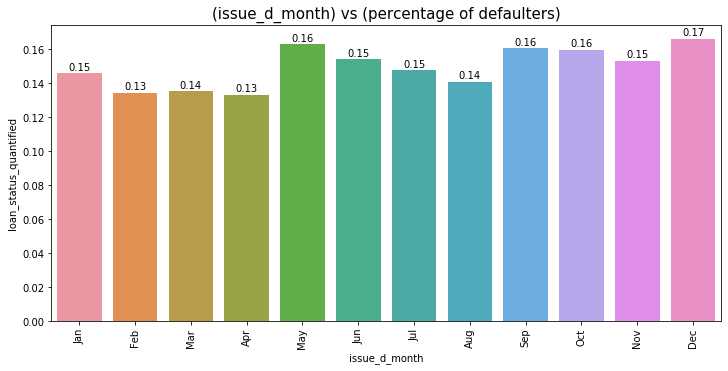

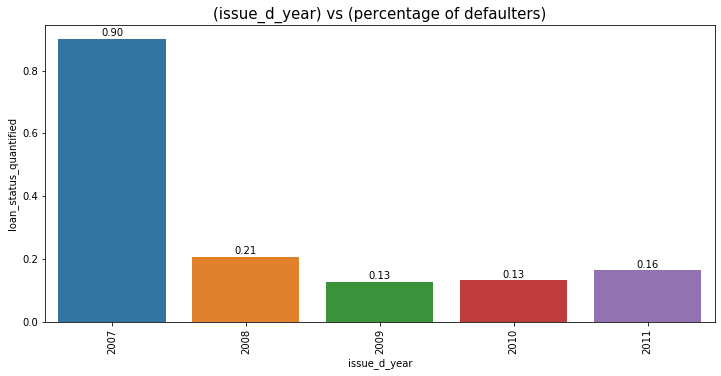

In [95]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("(issue_d_month) vs (percentage of defaulters)",fontsize=15)
plots = sns.barplot(loan_analysis.issue_d_month,loan_analysis.loan_status_quantified, order=loan_analysis.issue_d_month.unique().tolist()[::-1],ci=None)
annotate(plots)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("(issue_d_year) vs (percentage of defaulters)",fontsize=15)
plots = sns.barplot(loan_analysis.issue_d_year,loan_analysis.loan_status_quantified,ci=None)
annotate(plots)
plt.xticks(rotation = 90)
plt.show()

In [96]:
# creating a dataframe with percentage of defaulters for each variable
req_columns = ['term',
              'emp_length',
              'grade',
              'sub_grade',
              'home_ownership',
              'verification_status',
              'pub_rec',
              'pub_rec_bankruptcies',
              'loan_amnt_segmented_4',
              'int_rate_segmented_4',
              'open_acc_segmented_5',
              'dti_segmented_5',
              'annual_inc_segmented_5',
              'revol_util_segmented_5',
              'total_acc_segmented_5',
              'installment_segmented_5',
              'inq_last_6mths',
              'purpose',
              'issue_d_month',
              'issue_d_year']

In [97]:
frames = []
for i in req_columns:
    data = pd.pivot_table(loan_analysis, index= i ,values ="loan_status_quantified", aggfunc= np.mean)
    data["loan_attributes"] = i
    data = data.reset_index()
    frames.append(data)
data_percentages = pd.concat(frames)
data_percentages.head()

term  loan_status_quantified loan_attributes emp_length grade sub_grade  \
0  36.0                0.115541            term        NaN   NaN       NaN   
1  60.0                0.256968            term        NaN   NaN       NaN   
0   NaN                0.146840      emp_length     1 year   NaN       NaN   
1   NaN                0.158409      emp_length  10+ years   NaN       NaN   
2   NaN                0.134346      emp_length    2 years   NaN       NaN   

  home_ownership verification_status  pub_rec  pub_rec_bankruptcies  \
0            NaN                 NaN      NaN                   NaN   
1            NaN                 NaN      NaN                   NaN   
0            NaN                 NaN      NaN                   NaN   
1            NaN                 NaN      NaN                   NaN   
2            NaN                 NaN      NaN                   NaN   

  loan_amnt_segmented_4 int_rate_segmented_4 open_acc_segmented_5  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   

  dti_segmented_5 annual_inc_segmented_5 revol_util_segmented_5  \
0             NaN                    NaN                    NaN   
1             NaN                    NaN                    NaN   
0             NaN                    NaN                    NaN   
1             NaN                    NaN                    NaN   
2             NaN                    NaN                    NaN   

  total_acc_segmented_5 installment_segmented_5  inq_last_6mths purpose  \
0                   NaN                     NaN             NaN     NaN   
1                   NaN                     NaN             NaN     NaN   
0                   NaN                     NaN             NaN     NaN   
1                   NaN                     NaN             NaN     NaN   
2                   NaN                     NaN             NaN     NaN   

  issue_d_month  issue_d_year  
0           NaN           NaN  
1           NaN           NaN  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN

In [98]:
# modifying the dataframe get the useful info
data_percentages["categories"] = data_percentages[req_columns].apply(lambda x : "".join(x.dropna().astype(str)),axis=1)
data_percentages = data_percentages[['loan_attributes','categories', 'loan_status_quantified']]
data_percentages = data_percentages.reset_index(drop=True)
data_percentages = data_percentages.rename(columns={"loan_status_quantified": "percentage_of_defaulters"})
data_percentages.percentage_of_defaulters = data_percentages.percentage_of_defaulters.apply(lambda x : round(x,2))
data_percentages

loan_attributes categories  percentage_of_defaulters
0              term       36.0                      0.12
1              term       60.0                      0.26
2        emp_length     1 year                      0.15
3        emp_length  10+ years                      0.16
4        emp_length    2 years                      0.13
..              ...        ...                       ...
143    issue_d_year     2007.0                      0.90
144    issue_d_year     2008.0                      0.21
145    issue_d_year     2009.0                      0.13
146    issue_d_year     2010.0                      0.13
147    issue_d_year     2011.0                      0.16

[148 rows x 3 columns]

In [99]:
# obtaining the difference_in_percentage_of_defaulters from above dataframe also sorted the obtained dataframe.
data_percentage_difference = pd.DataFrame(data_percentages.groupby("loan_attributes")["percentage_of_defaulters"].max()-data_percentages.groupby("loan_attributes")["percentage_of_defaulters"].min())
data_percentage_difference = data_percentage_difference.reset_index()
data_percentage_difference = data_percentage_difference.rename(columns={"percentage_of_defaulters":"difference_in_percentage_of_defaulters"})
data_percentage_difference = data_percentage_difference.sort_values(by ="difference_in_percentage_of_defaulters",ascending=False)
data_percentage_difference = data_percentage_difference.reset_index(drop=True)
data_percentage_difference

loan_attributes  difference_in_percentage_of_defaulters
0              issue_d_year                                    0.77
1                 sub_grade                                    0.46
2                     grade                                    0.28
3      pub_rec_bankruptcies                                    0.26
4                   pub_rec                                    0.24
5      int_rate_segmented_4                                    0.19
6                   purpose                                    0.17
7            inq_last_6mths                                    0.17
8                      term                                    0.14
9    revol_util_segmented_5                                    0.10
10   annual_inc_segmented_5                                    0.08
11    loan_amnt_segmented_4                                    0.06
12           home_ownership                                    0.05
13          dti_segmented_5                                    0.04
14            issue_d_month                                    0.04
15  installment_segmented_5                                    0.03
16               emp_length                                    0.03
17    total_acc_segmented_5                                    0.03
18      verification_status                                    0.03
19     open_acc_segmented_5                                    0.01

In [100]:
# Found below insights after univariate analysis
# Top 10 variables with corresponding default rate.
# Here we can ingnore grade and sub grade(derived from interest rate) as we are already considering int_rate.
data_percentage_difference[0:12]

loan_attributes  difference_in_percentage_of_defaulters
0             issue_d_year                                    0.77
1                sub_grade                                    0.46
2                    grade                                    0.28
3     pub_rec_bankruptcies                                    0.26
4                  pub_rec                                    0.24
5     int_rate_segmented_4                                    0.19
6                  purpose                                    0.17
7           inq_last_6mths                                    0.17
8                     term                                    0.14
9   revol_util_segmented_5                                    0.10
10  annual_inc_segmented_5                                    0.08
11   loan_amnt_segmented_4                                    0.06

#### 2.) Bi-variate analysis

In [101]:
loan_analysis.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0  36.0   
1  1077430    1314167       2500         2500           2500.0  60.0   
2  1077175    1313524       2400         2400           2400.0  36.0   
3  1076863    1277178      10000        10000          10000.0  36.0   
4  1075269    1311441       5000         5000           5000.0  36.0   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11   fully paid     credit_card  27.65   
1     30000.0     Source Verified  Dec-11  charged off             car   1.00   
2     12252.0        Not Verified  Dec-11   fully paid  small_business   8.72   
3     49200.0     Source Verified  Dec-11   fully paid           other  20.00   
4     36000.0     Source Verified  Dec-11   fully paid         wedding  11.20   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               3         9        0        28.3         12   

   pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
0                   0.0                       0       (3200.0, 5000.0]   
1                   0.0                       1      (499.999, 3200.0]   
2                   0.0                       0      (499.999, 3200.0]   
3                   0.0                       0      (8000.0, 10000.0]   
4                   0.0                       0       (3200.0, 5000.0]   

      loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
0       Low (500.0, 5500.0]  Medium (8.94, 11.83]   V Low (1.999, 6.0]   
1       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
2       Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3  Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
4       Low (500.0, 5500.0]     Low (5.419, 8.94]   Medium (8.0, 10.0]   

         dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
0  V High (19.75, 29.99]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
1        V Low [0, 7.03]        V Low [0, 20.3]   V Low (1.999, 12.0]   
2      Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3  V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
4      Low (7.03, 11.42]       Low (20.3, 40.3]   V Low (1.999, 12.0]   

  installment_segmented_5     annual_inc_segmented_5 issue_d_month  \
0   Low (151.42, 231.084]  V Low (3999.999, 38000.0]           Dec   
1   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]           Dec   
2   V Low [16.08, 151.42]  V Low (3999.999, 38000.0]           Dec   
3  High (330.538, 482.92]     Low (38000.0, 51000.0]           Dec   
4   Low (151.42, 231.084]  V Low (3999.999, 38000.0]           Dec   

   issue_d_year  
0          2011  
1          2011  
2          2011  
3          2011  
4          2011

##### plotting the heat maps for "Top 5 variables" with all the other "considerable_loan_attributes" to see the important combinations of driver variables.

In [102]:
# considering top 5 influencing variables(excluding grade and sub_grade) for our analysis.
data_percentage_difference[0:7]

loan_attributes  difference_in_percentage_of_defaulters
0          issue_d_year                                    0.77
1             sub_grade                                    0.46
2                 grade                                    0.28
3  pub_rec_bankruptcies                                    0.26
4               pub_rec                                    0.24
5  int_rate_segmented_4                                    0.19
6               purpose                                    0.17

In [103]:
top5_loan_attributes = ['issue_d_year','pub_rec_bankruptcies','pub_rec','int_rate_segmented_4','purpose']

In [104]:
data_percentage_difference.loan_attributes.tolist()
considerable_loan_attributes = ['issue_d_year','pub_rec_bankruptcies','pub_rec','int_rate_segmented_4','purpose','inq_last_6mths',
                                'term','revol_util_segmented_5','annual_inc_segmented_5','loan_amnt_segmented_4','home_ownership',
                                'dti_segmented_5','issue_d_month','installment_segmented_5','emp_length','total_acc_segmented_5',
                                'verification_status','open_acc_segmented_5']

##### a.) issue_d_year
#####     1.)  Here after plotting heat maps for  "issue_d_year" againts all "considerable attribute" we see that irrespective of different attributes againts issue_d_year we only see highest defaulter in the year 2007 making it difficult to find a important combination of driver variables.
#####     2.) We found that there was a recession in the year 2007 which may be considered as one of the potential reason for the highest number of defaulters in that year.
#####     3.) Having limited no of years made it difficult to obtain the trend pattern.

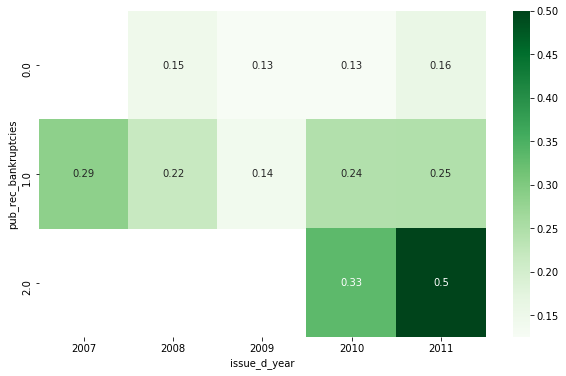

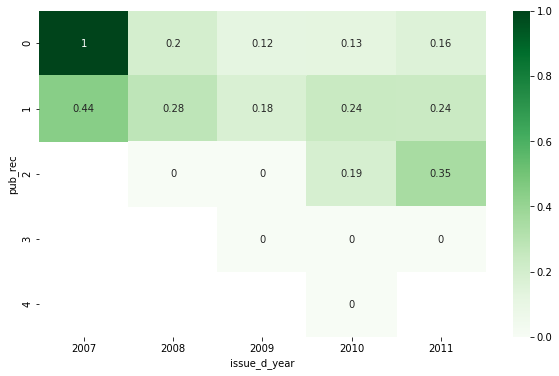

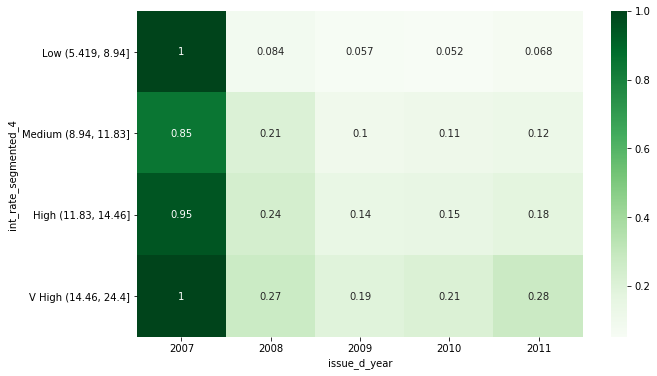

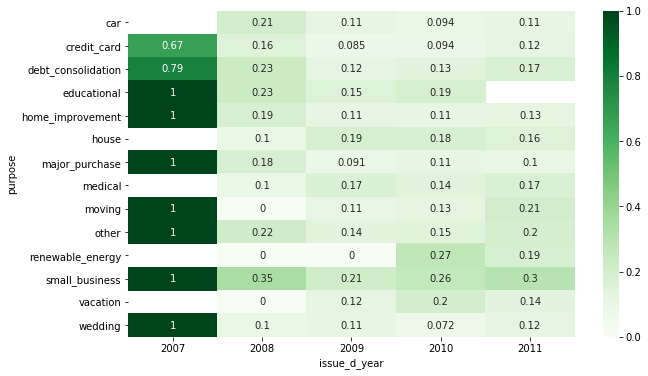

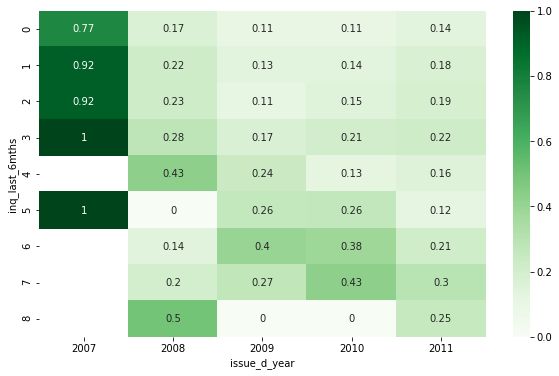

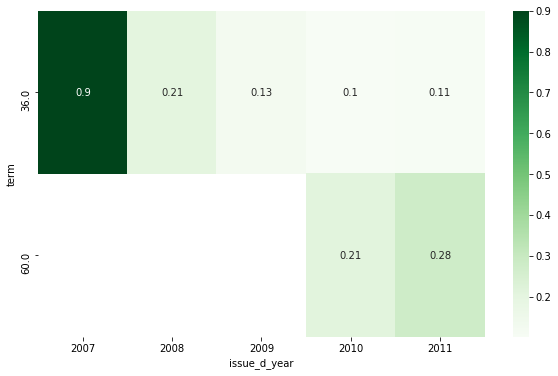

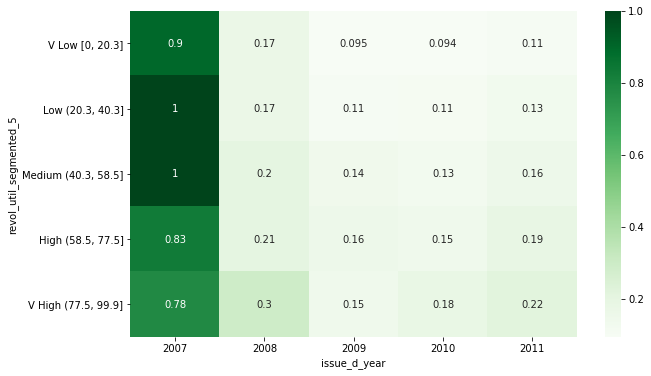

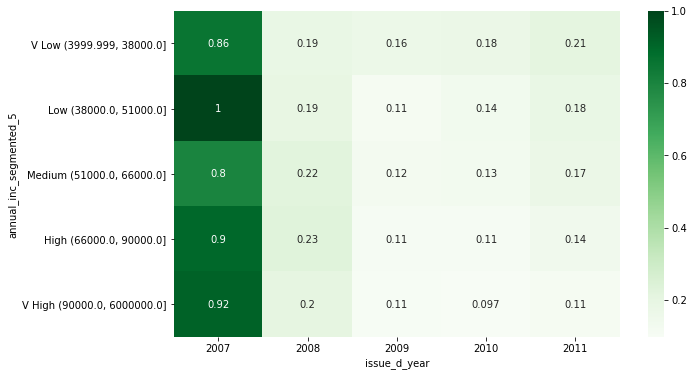

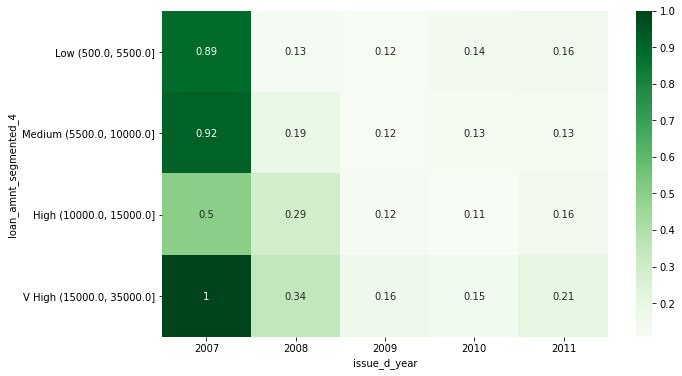

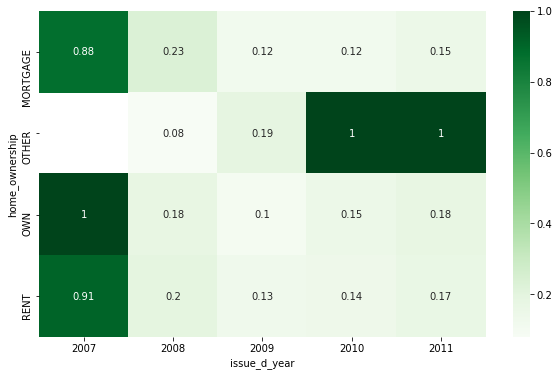

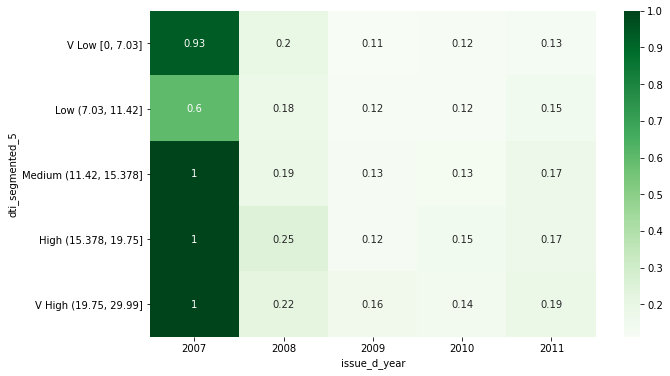

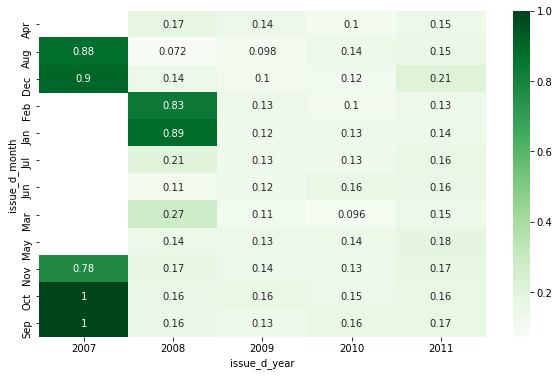

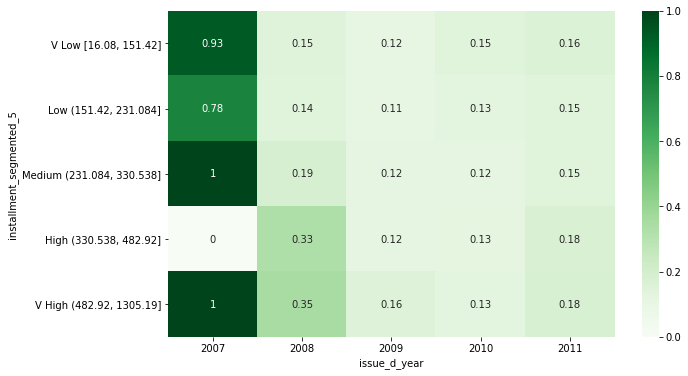

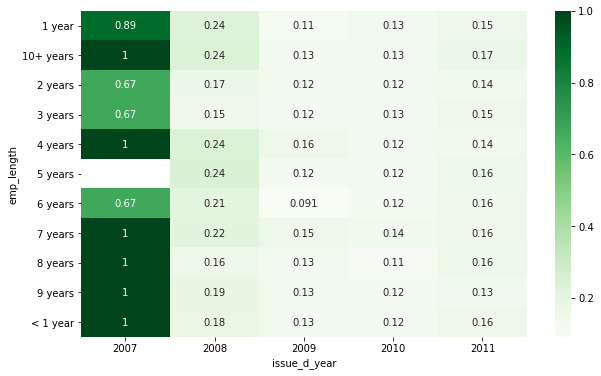

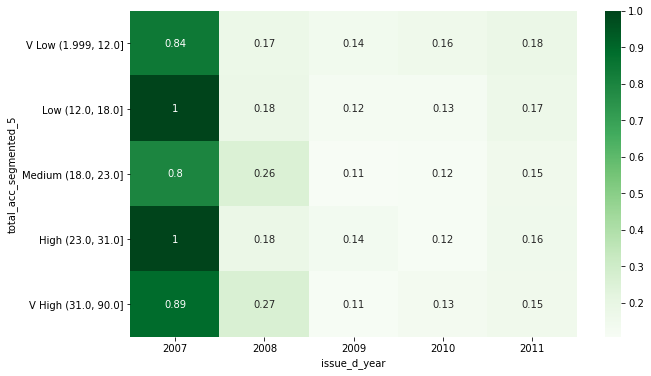

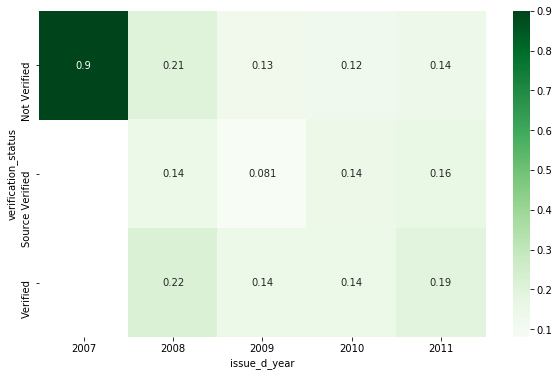

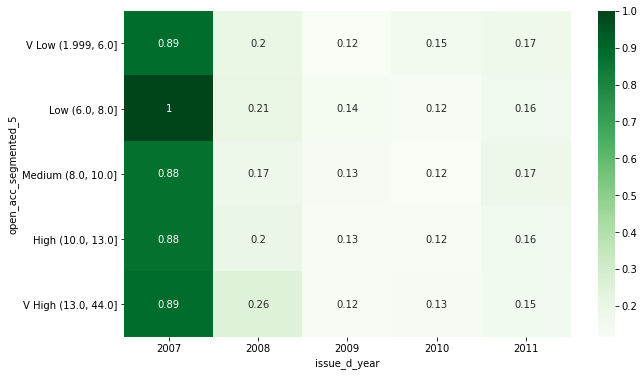

In [105]:
# Analysis "issue_d_year" with other attributes to find the insights of important combination of driver variables.
# Here "pub_rec_bankruptcies" and "home_ownership" are the two attributes which provide different insight when plotted against "issue_d_year".
# But unable get important combinations because of limited no of years.
# Rest of the other attributes tend to have highest defaulters in the year 2007 as mentioned above.
for index in considerable_loan_attributes:
    if index != "issue_d_year":
        heat_map=pd.pivot_table(loan_analysis,index=index,columns="issue_d_year",values="loan_status_quantified",aggfunc=np.mean)
        plt.figure(figsize=(10,6))
        sns.heatmap(heat_map,cmap="Greens", annot=True)
        plt.show()

##### b.) 'pub_rec_bankruptcies'

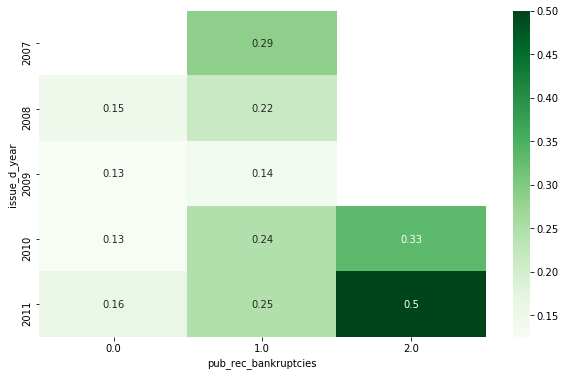

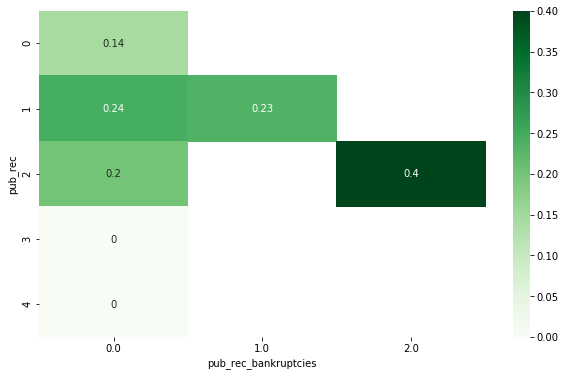

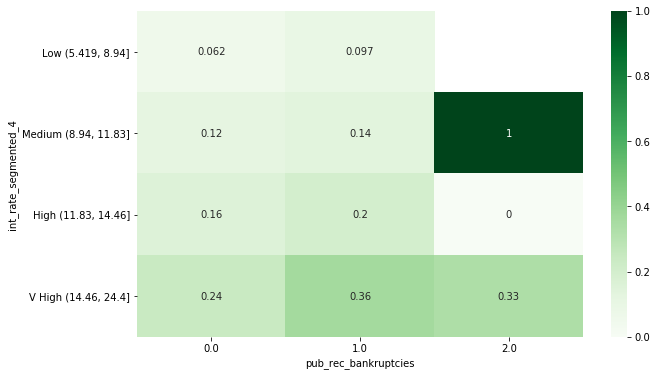

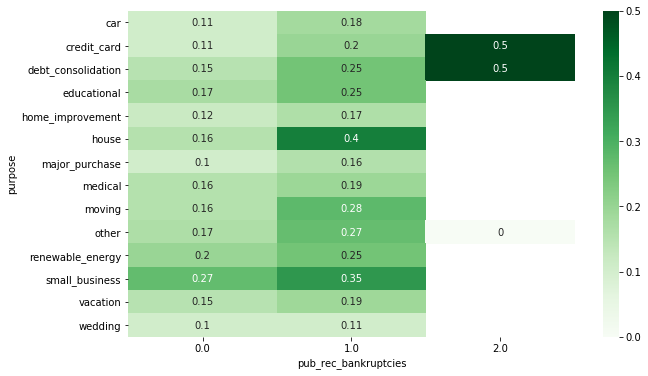

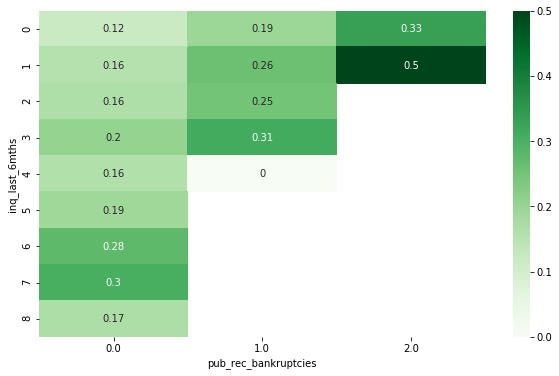

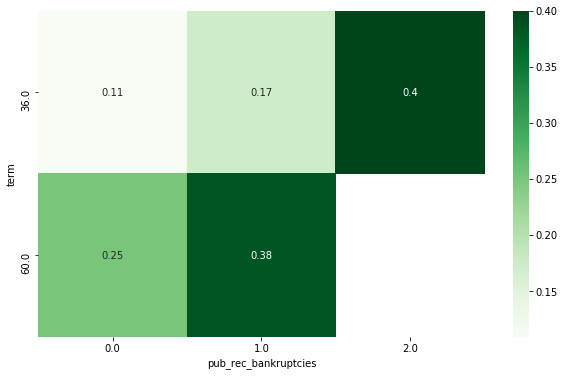

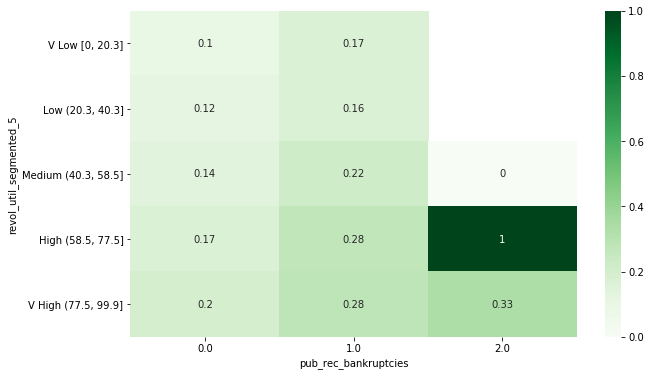

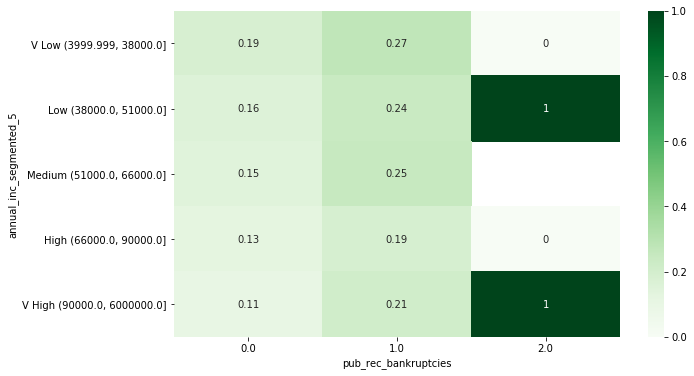

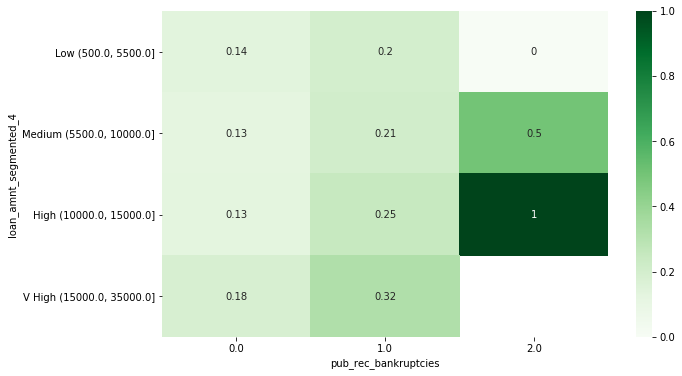

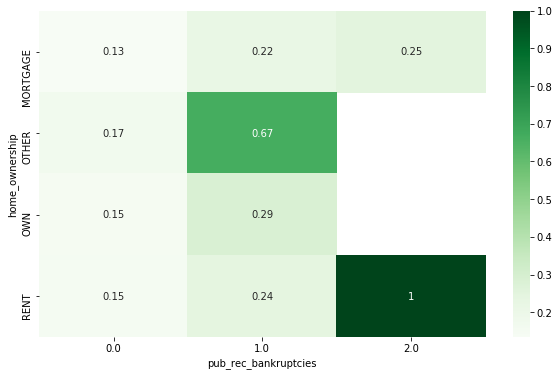

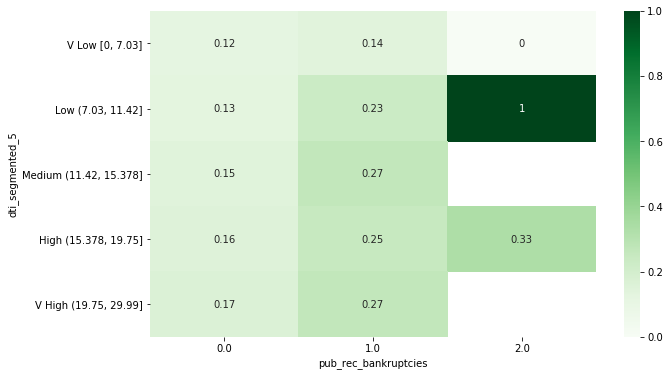

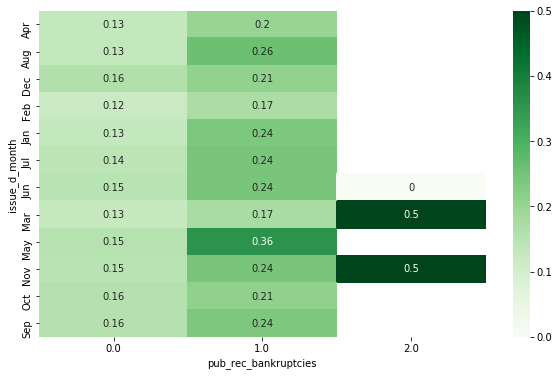

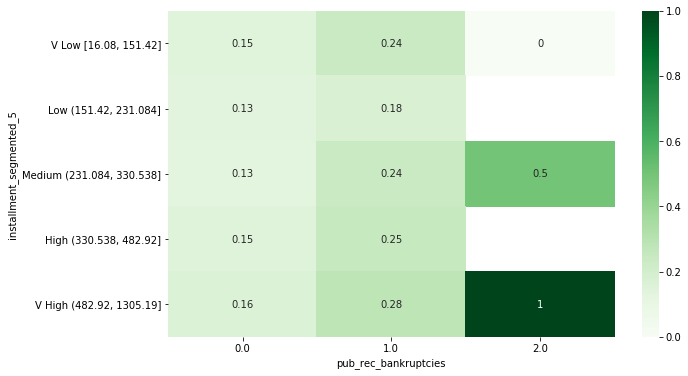

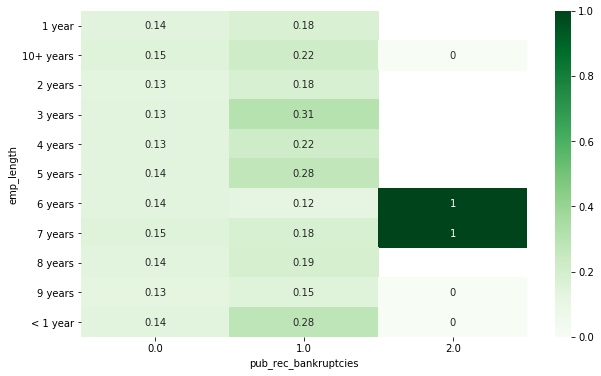

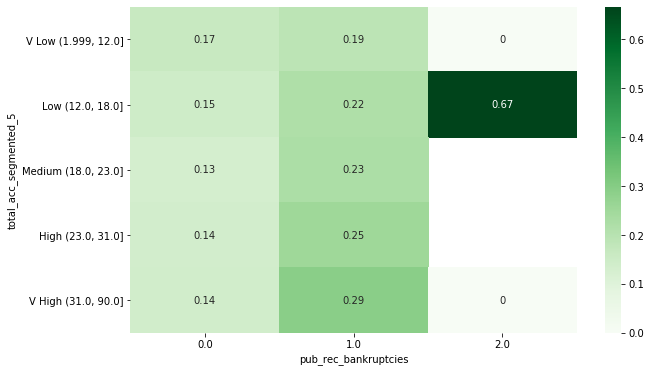

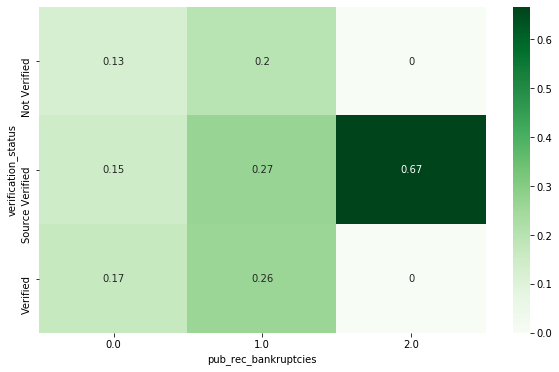

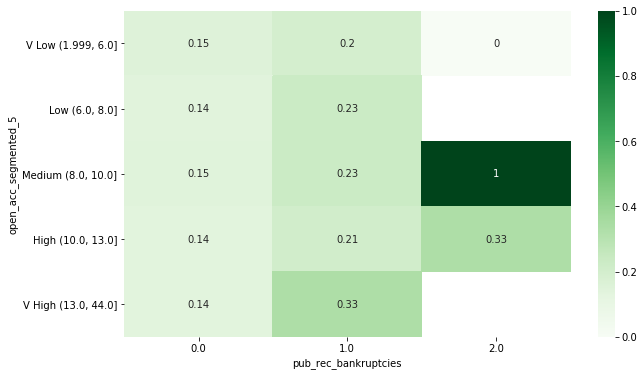

In [106]:
# Analysis "pub_rec_bankruptcies" with other attributes to find the insights of important combination of driver variables.

for index in considerable_loan_attributes:
    if index != "pub_rec_bankruptcies":
        heat_map=pd.pivot_table(loan_analysis,index=index,columns="pub_rec_bankruptcies",values="loan_status_quantified",aggfunc=np.mean)
        plt.figure(figsize=(10,6))
        sns.heatmap(heat_map,cmap="Greens", annot=True)
        plt.show()

##### c.) 'pub_rec'
#####     1.)  Here after plotting heat maps for  "pub_rec" againts all "considerable attribute" we see that irrespective of different attributes againts "pub_rec" only "0 ","1","2" categories have defaulter percentage and can find few important combination of driver variables(excluding 3,4 categories of pub_rec).

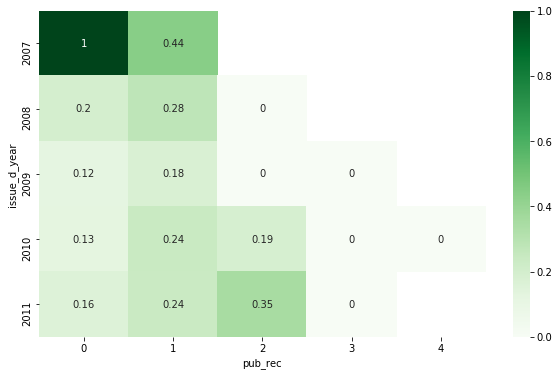

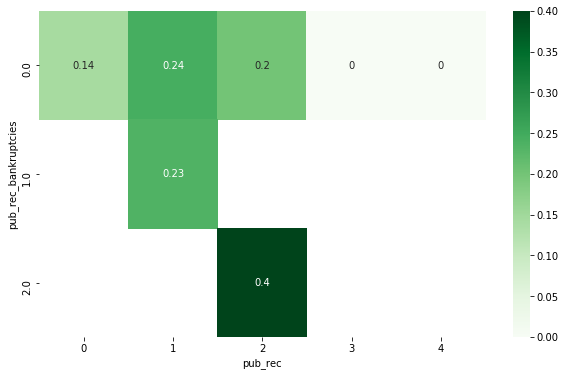

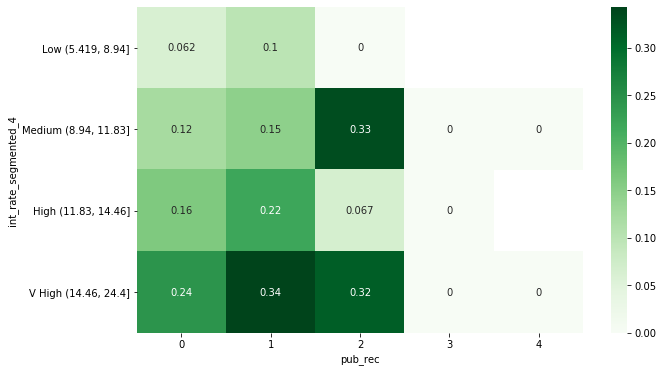

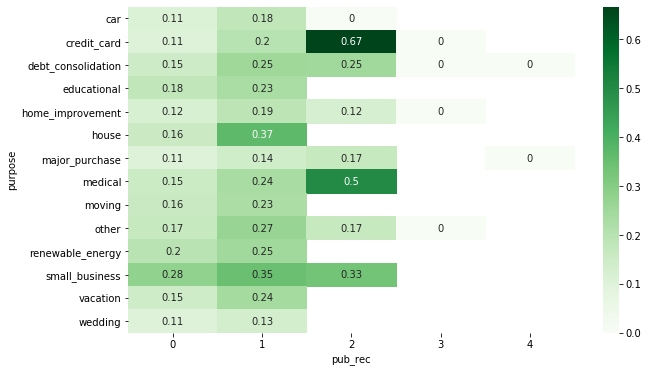

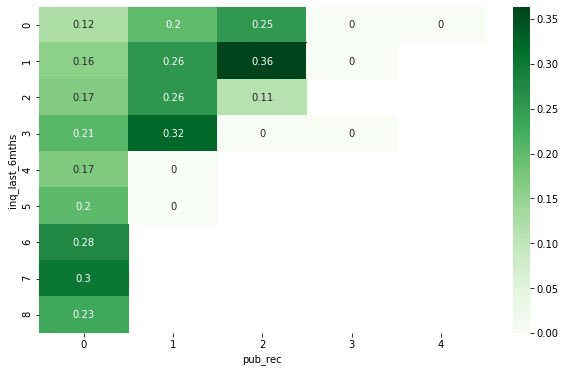

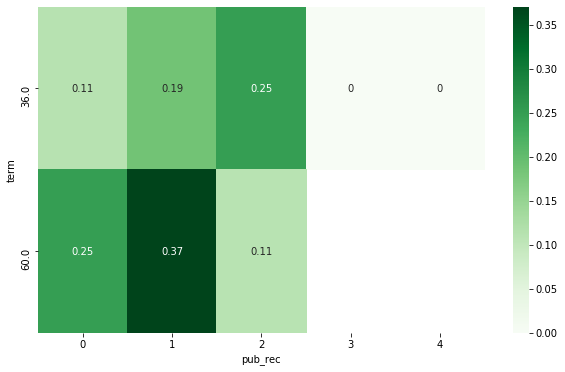

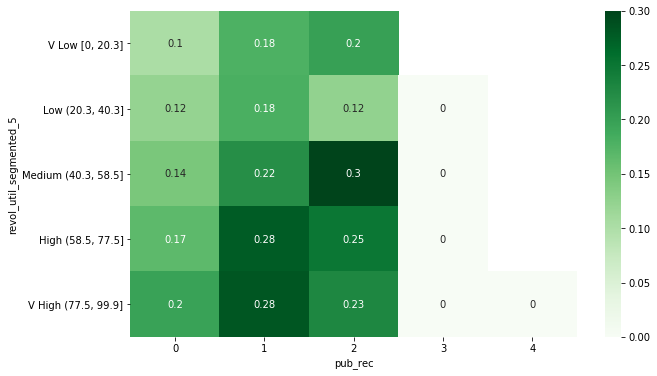

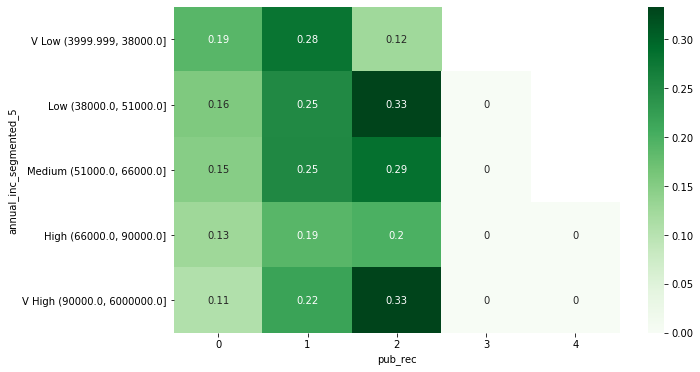

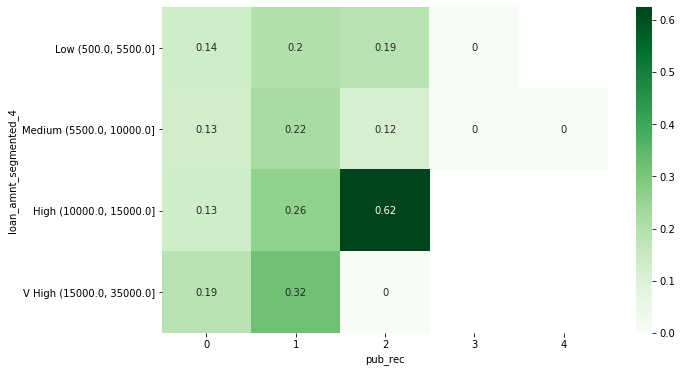

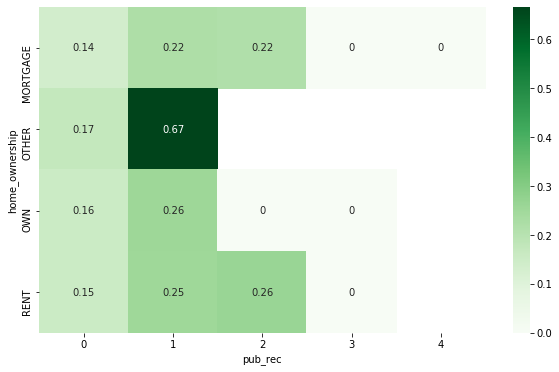

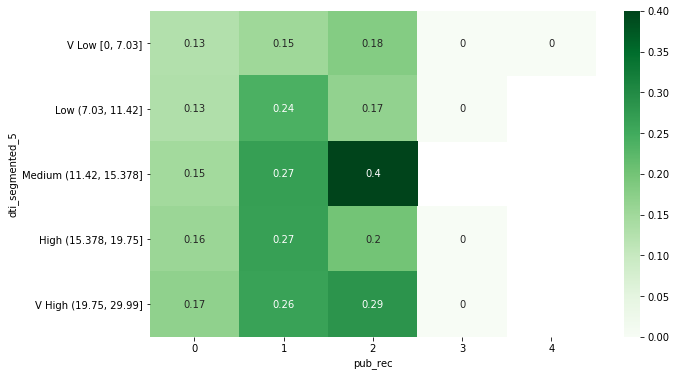

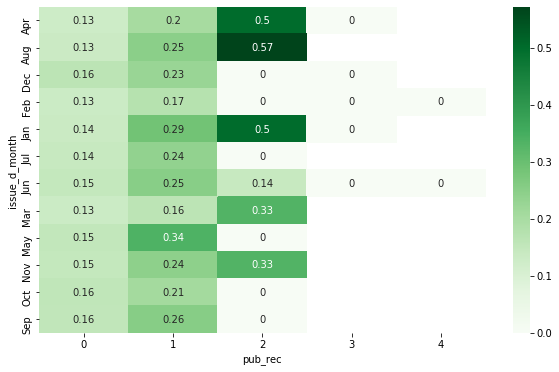

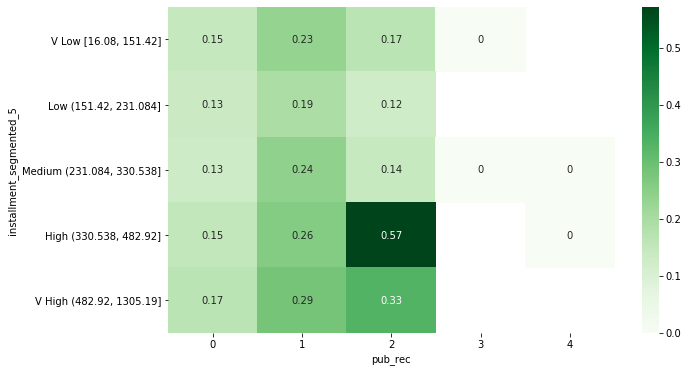

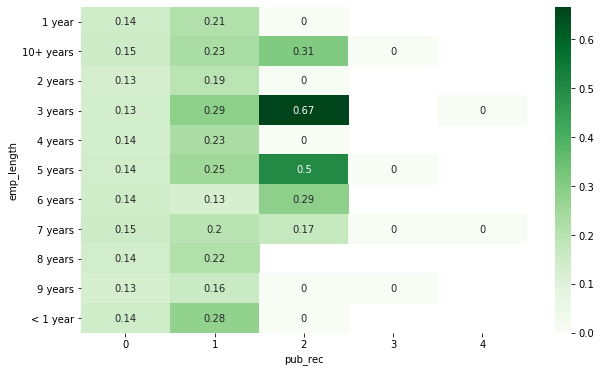

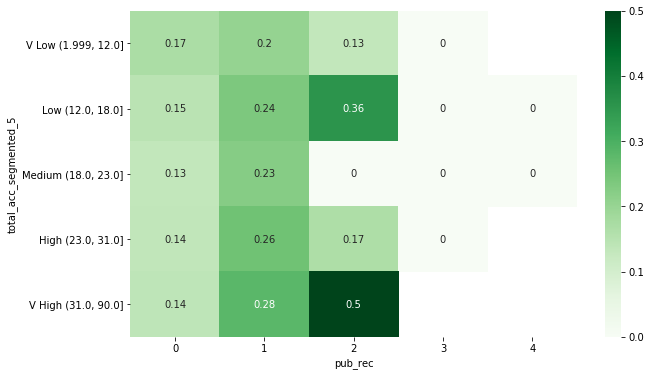

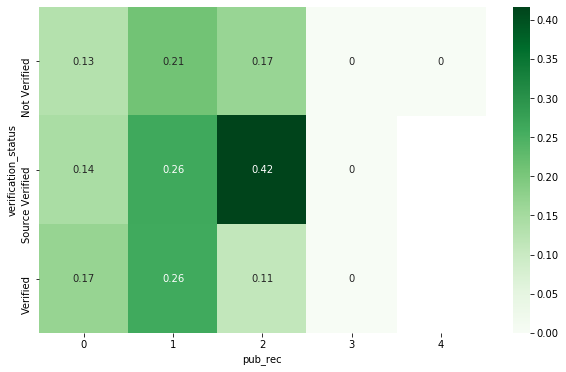

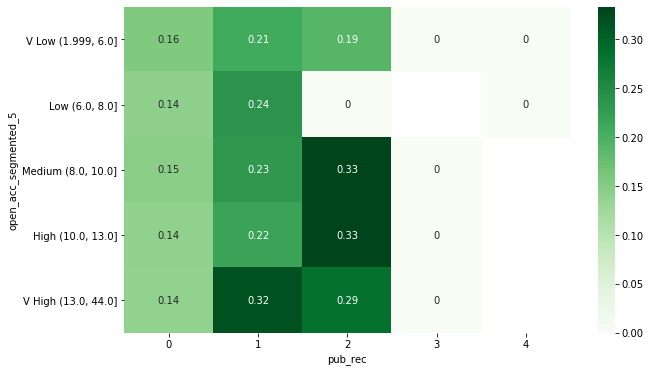

In [107]:
# Analysis term with other parameters to their influence
for index in considerable_loan_attributes:
    if index != "pub_rec":
        heat_map=pd.pivot_table(loan_analysis,index=index,columns="pub_rec",values="loan_status_quantified",aggfunc=np.mean)
        plt.figure(figsize=(10,6))
        sns.heatmap(heat_map,cmap="Greens", annot=True)
        plt.show()

##### d.) 'int_rate_segmented_4'
#####     1.)  Here after plotting heat maps for  "int_rate_segmented_4" againts all "considerable attribute" we see that irrespective of different attributes againts "int_rate_segmented_4" there is a gradual increase in defaulters percentage with increase in interest rate.

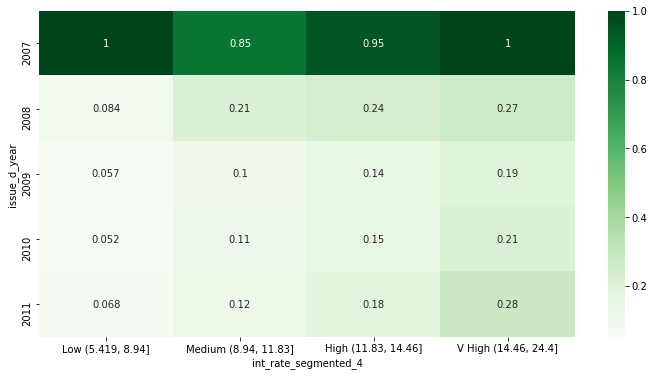

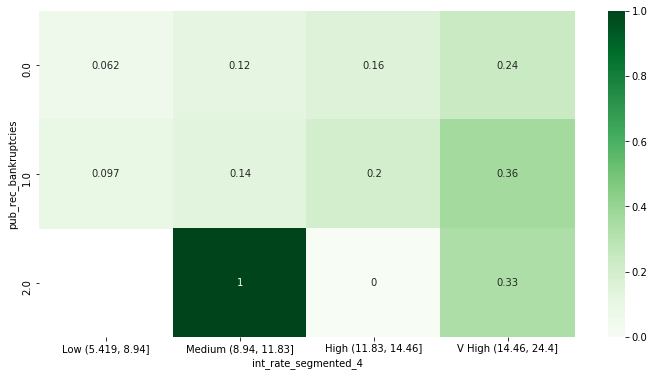

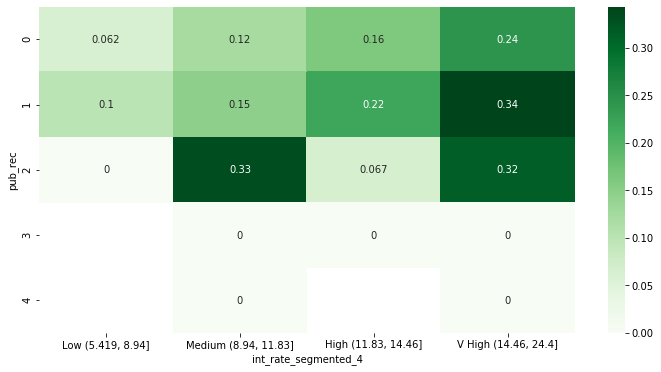

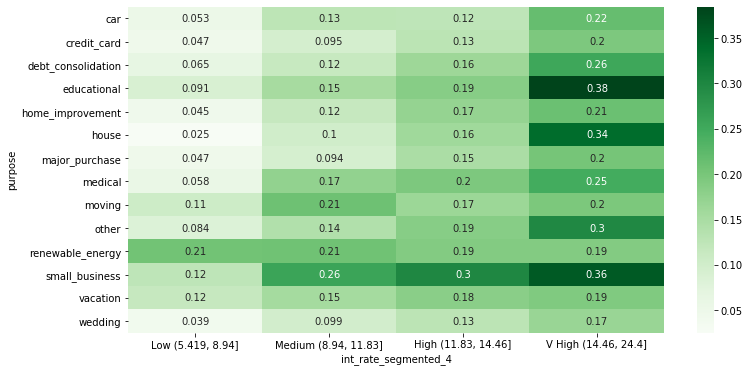

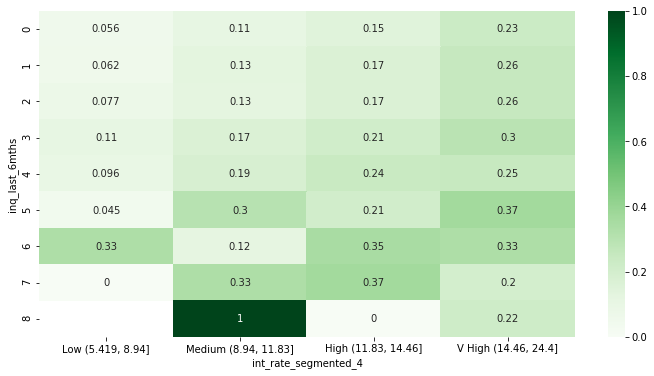

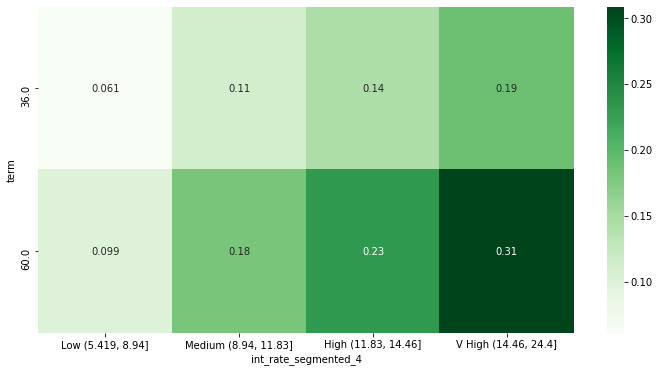

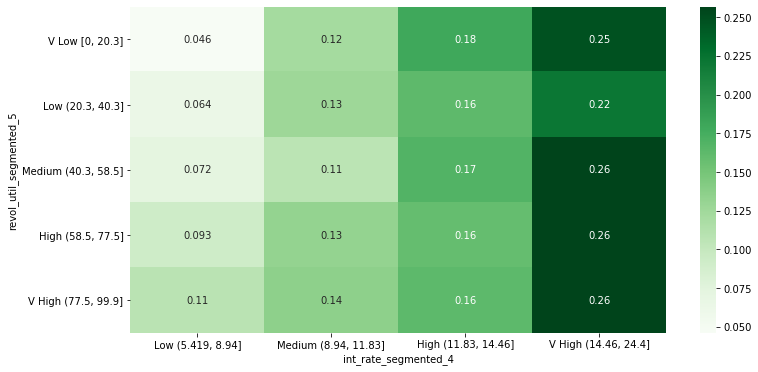

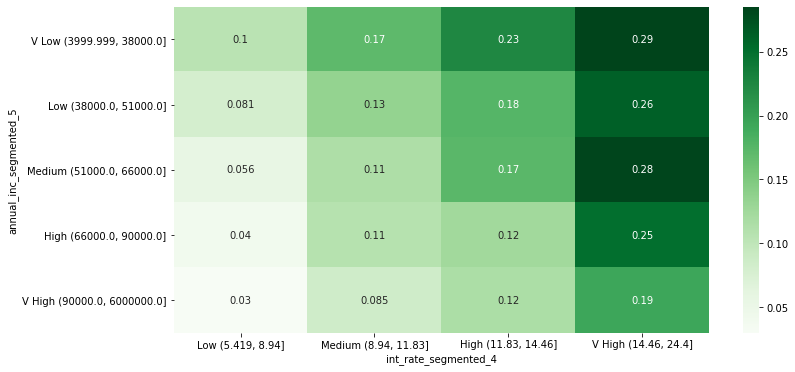

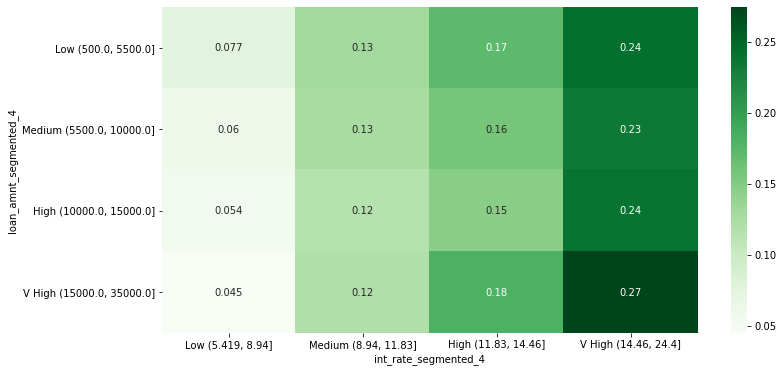

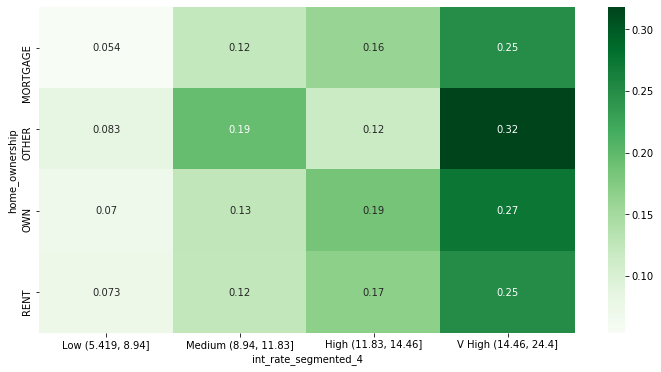

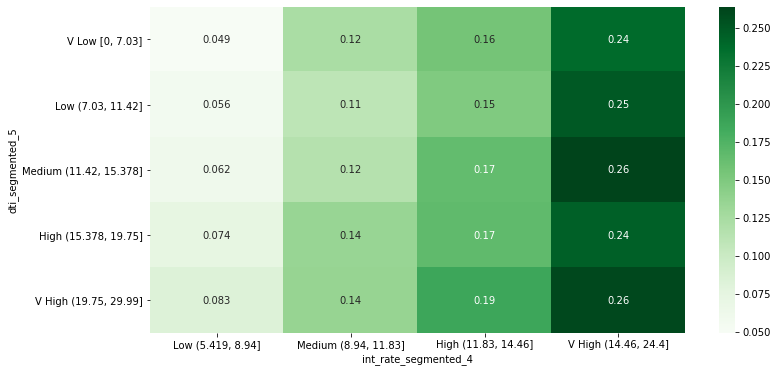

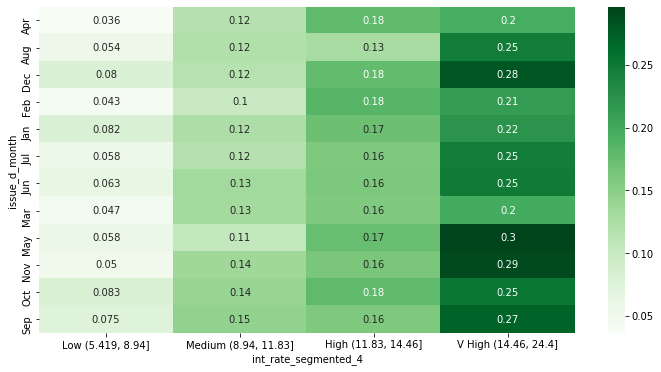

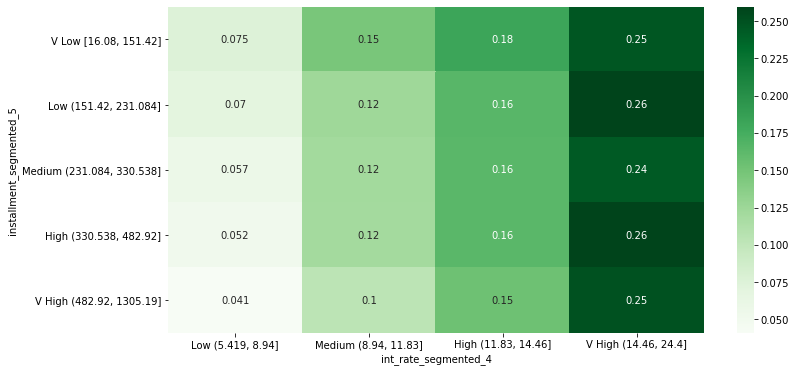

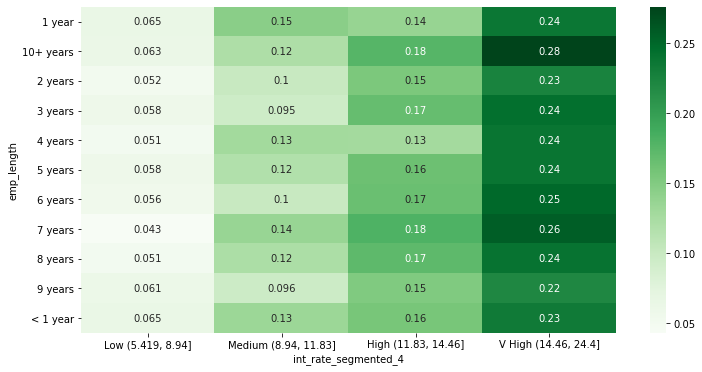

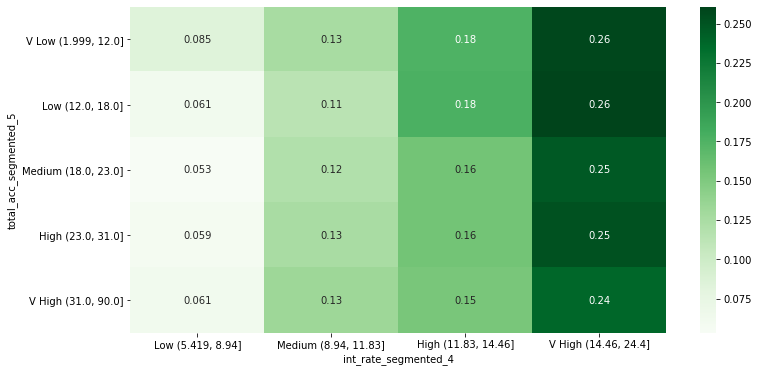

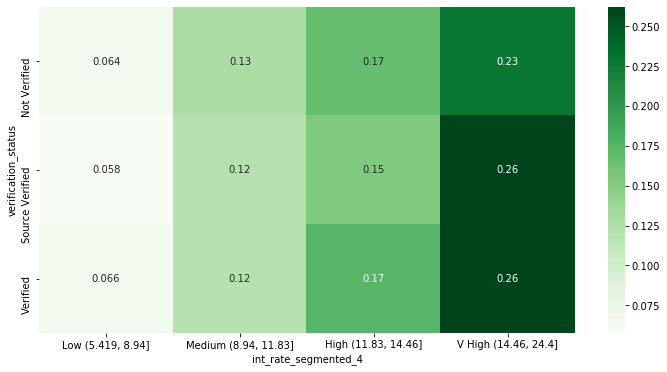

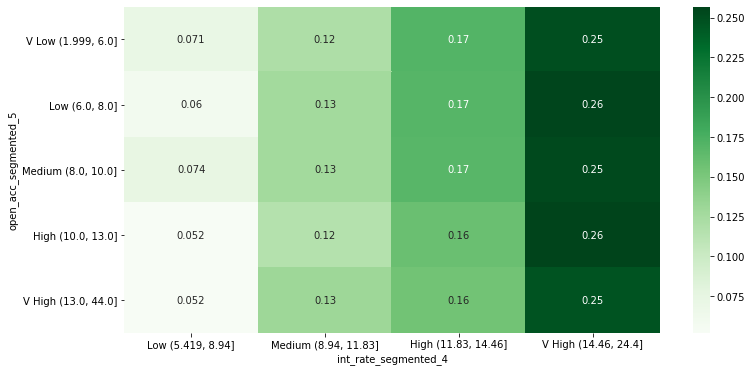

In [108]:
# Analysis term with other parameters to their influence
for index in considerable_loan_attributes:
    if index != "int_rate_segmented_4":
        heat_map=pd.pivot_table(loan_analysis,index=index,columns="int_rate_segmented_4",values="loan_status_quantified",aggfunc=np.mean)
        plt.figure(figsize=(12,6))
        sns.heatmap(heat_map,cmap="Greens", annot=True)
        plt.show()

##### e.) 'purpose'
#####     1.)  Insights for purpose variable is very diverse and difficult to obtain any conclusion out of it.

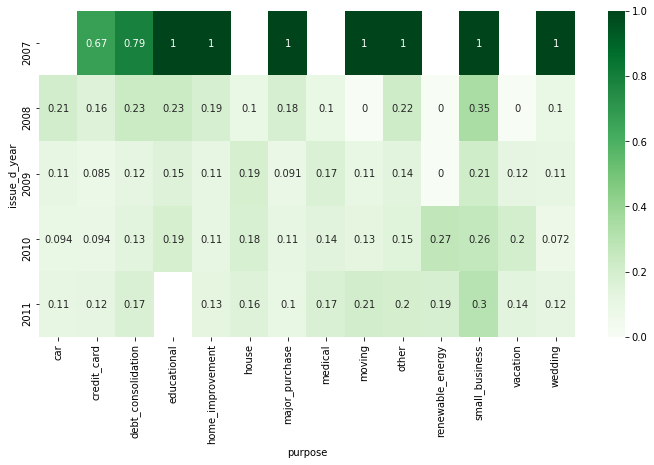

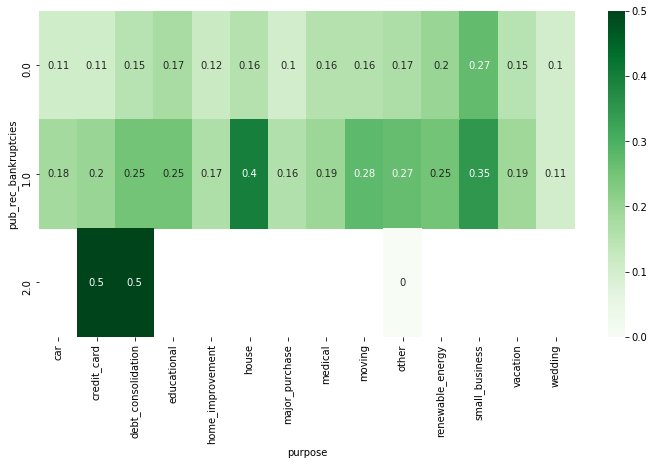

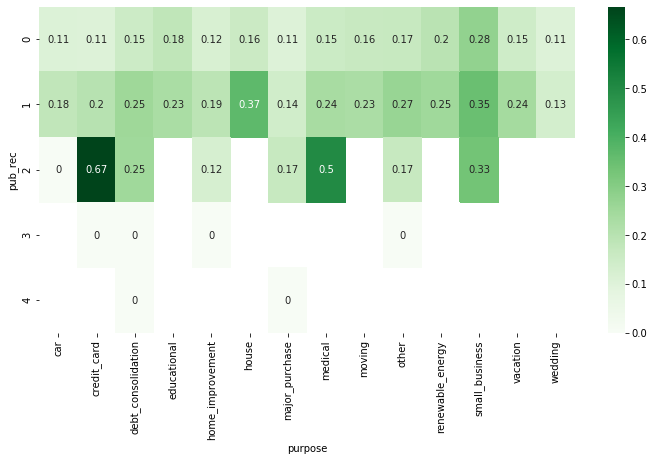

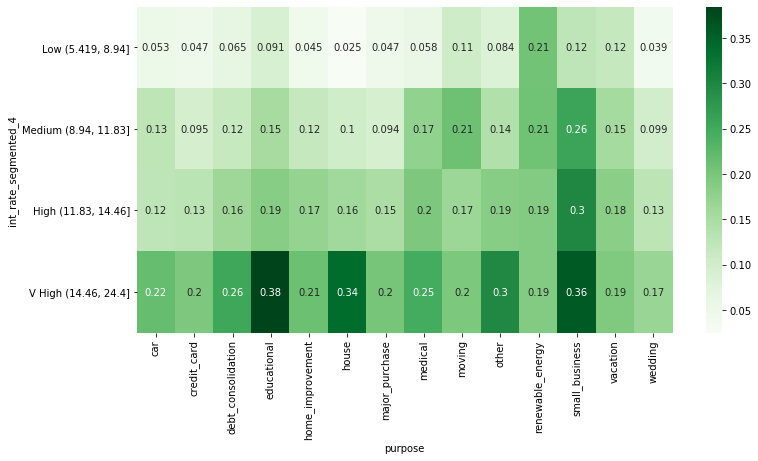

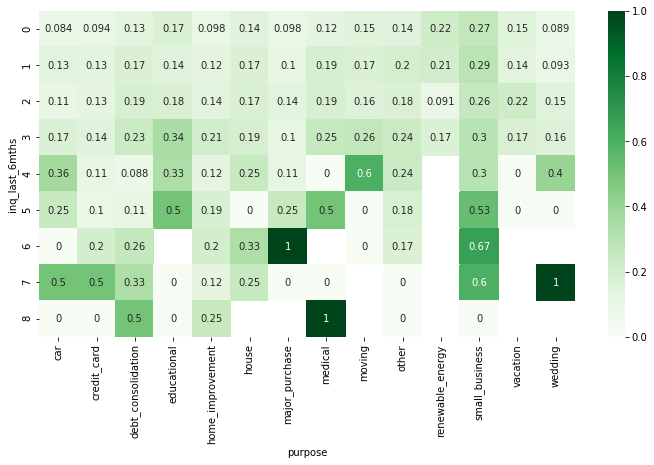

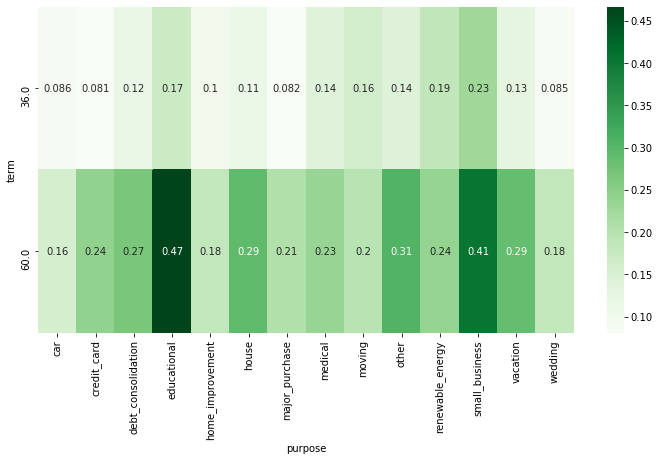

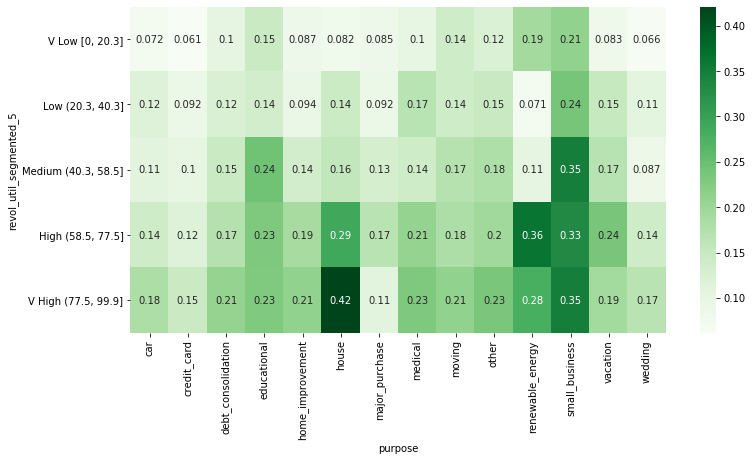

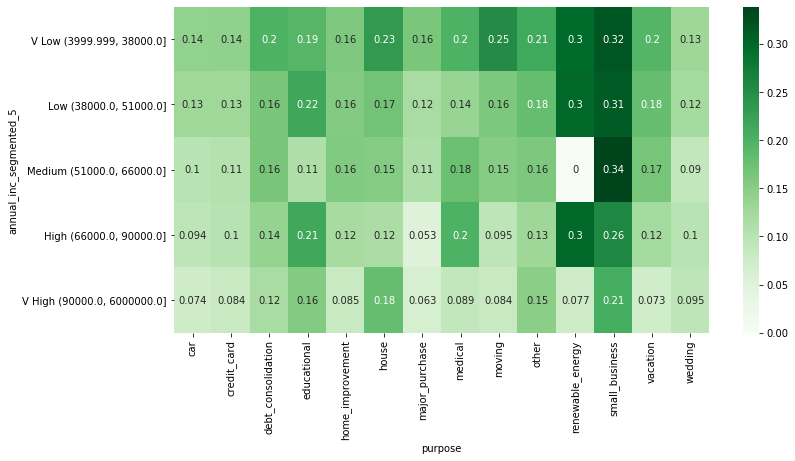

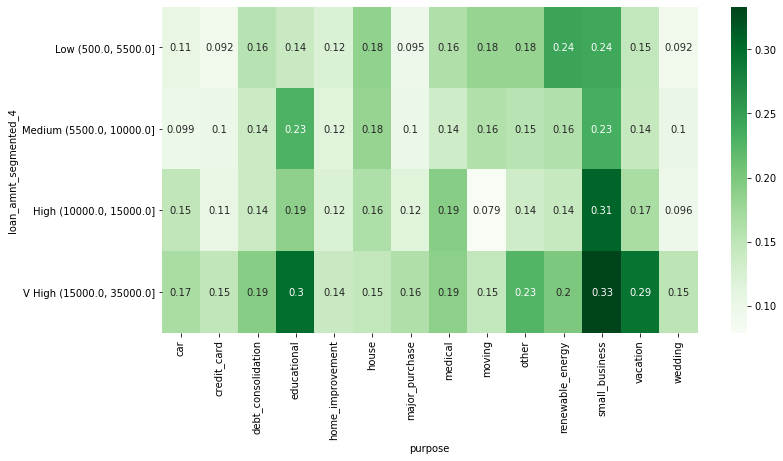

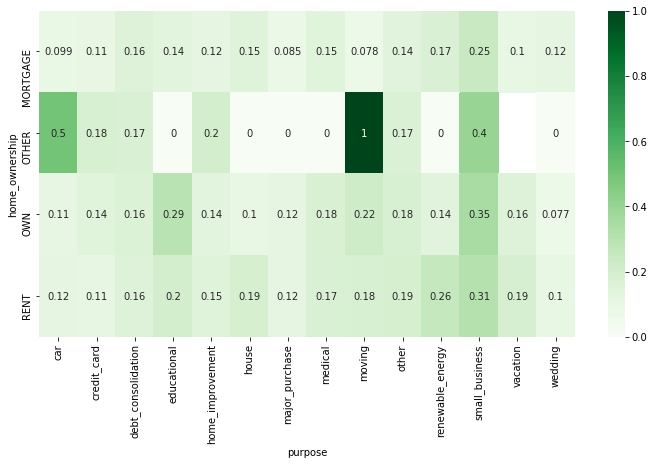

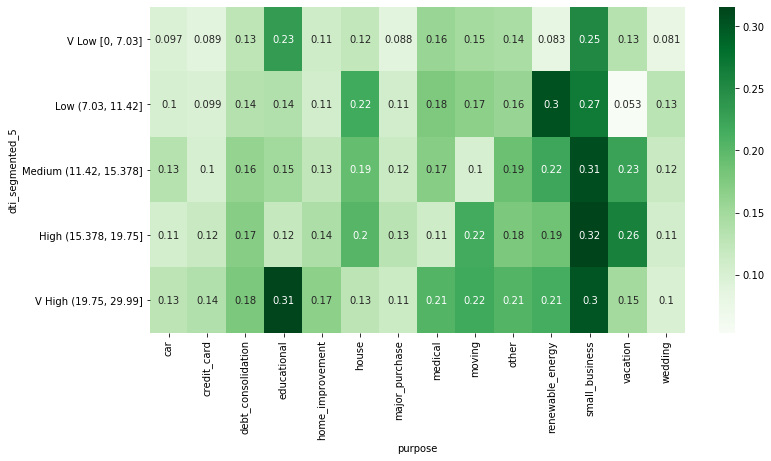

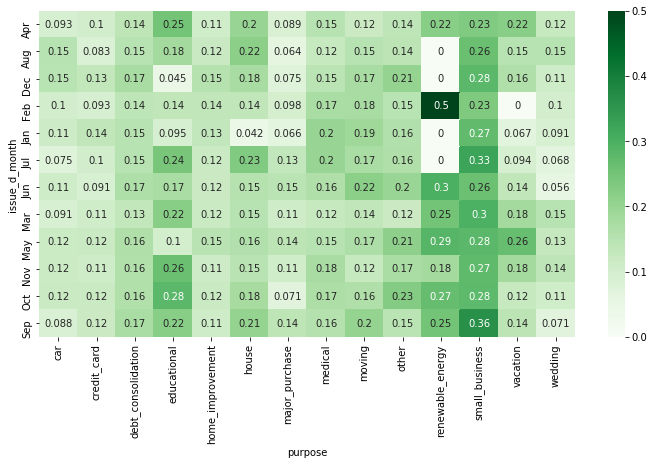

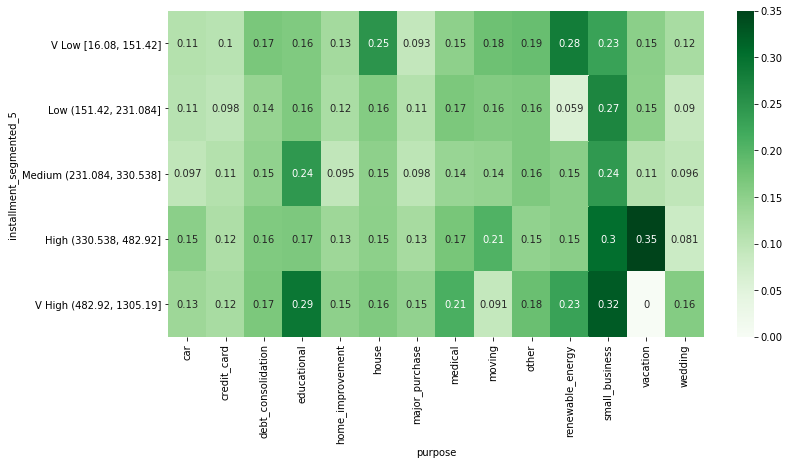

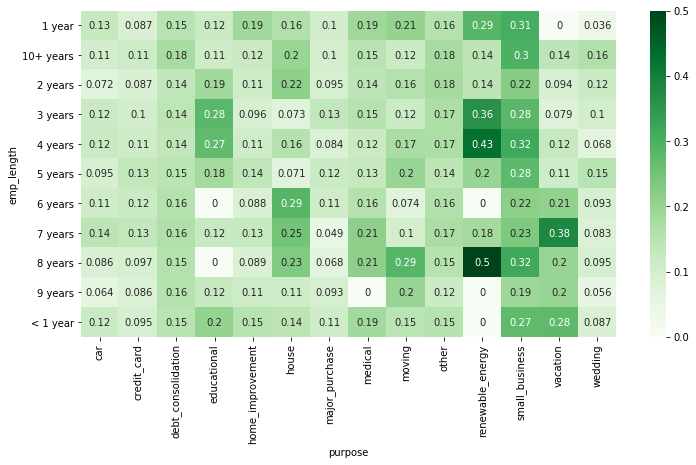

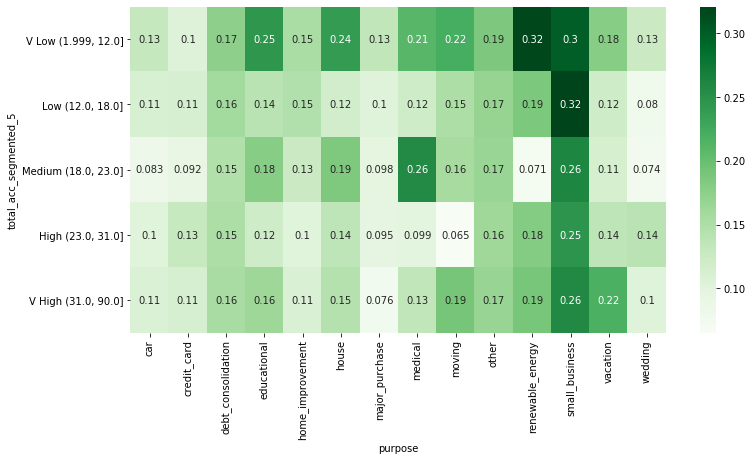

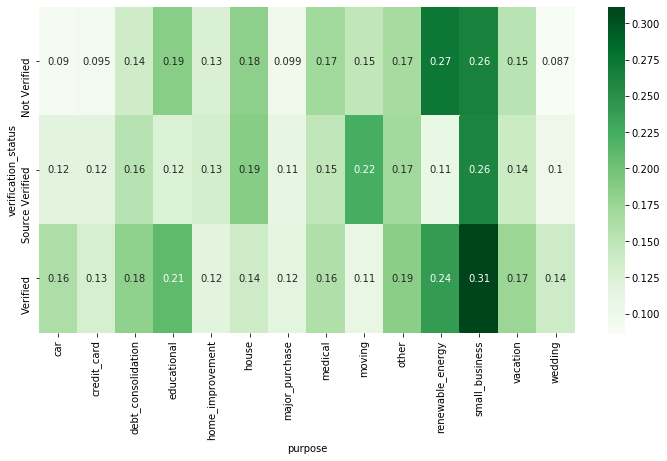

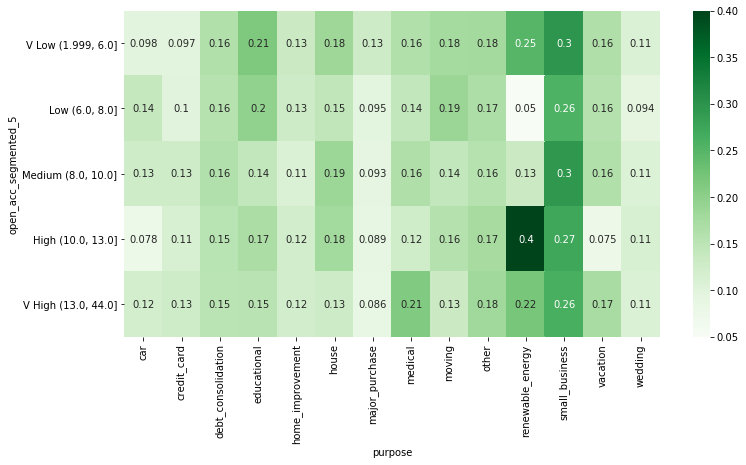

In [109]:
# Analysis term with other parameters to their influence
for index in considerable_loan_attributes:
    if index != "purpose":
        heat_map=pd.pivot_table(loan_analysis,index=index,columns="purpose",values="loan_status_quantified",aggfunc=np.mean)
        plt.figure(figsize=(12,6))
        sns.heatmap(heat_map,cmap="Greens", annot=True)
        plt.show()

In [110]:
# Considering top 5 categories of pursose(based on highest no of defaulters) 
loan_analysis_purpose = pd.pivot_table(loan_analysis,index= "purpose",values= "loan_status_quantified",aggfunc=np.mean)
loan_analysis_purpose = loan_analysis_purpose.reset_index()
loan_analysis_purpose = loan_analysis_purpose.sort_values("loan_status_quantified",ascending=False)
loan_analysis_purpose = loan_analysis_purpose.reset_index(drop=True)
loan_analysis_purpose

purpose  loan_status_quantified
0       small_business                0.281565
1     renewable_energy                0.200000
2          educational                0.184818
3                other                0.172518
4                house                0.168571
5               moving                0.166667
6              medical                0.161290
7   debt_consolidation                0.157720
8             vacation                0.154070
9     home_improvement                0.124683
10         credit_card                0.111800
11                 car                0.110647
12      major_purchase                0.106763
13             wedding                0.106667

In [111]:
loan_analysis_purpose_dataframe = loan_analysis[loan_analysis.purpose.isin(loan_analysis_purpose.purpose.tolist()[0:5])]
loan_analysis_purpose_dataframe.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
2   1077175    1313524       2400         2400           2400.0  36.0   
3   1076863    1277178      10000        10000          10000.0  36.0   
7   1071795    1306957       5600         5600           5600.0  60.0   
8   1071570    1306721       5375         5375           5350.0  60.0   
13  1069057    1303503      10000        10000          10000.0  36.0   

    int_rate  installment grade sub_grade emp_length home_ownership  \
2      15.96        84.33     C        C5  10+ years           RENT   
3      13.49       339.31     C        C1  10+ years           RENT   
7      21.28       152.39     F        F2    4 years            OWN   
8      12.69       121.45     B        B5   < 1 year           RENT   
13     10.65       325.74     B        B2    3 years           RENT   

    annual_inc verification_status issue_d  loan_status         purpose  \
2      12252.0        Not Verified  Dec-11   fully paid  small_business   
3      49200.0     Source Verified  Dec-11   fully paid           other   
7      40000.0     Source Verified  Dec-11  charged off  small_business   
8      15000.0            Verified  Dec-11  charged off           other   
13    100000.0     Source Verified  Dec-11  charged off           other   

      dti  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
2    8.72               2         2        0        98.5         10   
3   20.00               1        10        0        21.0         37   
7    5.55               2        11        0        32.6         13   
8   18.08               0         2        0        36.5          3   
13   7.06               2        14        0        55.5         29   

    pub_rec_bankruptcies  loan_status_quantified loan_amnt_segmented_10  \
2                    0.0                       0      (499.999, 3200.0]   
3                    0.0                       0      (8000.0, 10000.0]   
7                    0.0                       1       (5000.0, 6000.0]   
8                    0.0                       1       (5000.0, 6000.0]   
13                   0.0                       1      (8000.0, 10000.0]   

       loan_amnt_segmented_4  int_rate_segmented_4 open_acc_segmented_5  \
2        Low (500.0, 5500.0]  V High (14.46, 24.4]   V Low (1.999, 6.0]   
3   Medium (5500.0, 10000.0]   High (11.83, 14.46]   Medium (8.0, 10.0]   
7   Medium (5500.0, 10000.0]  V High (14.46, 24.4]    High (10.0, 13.0]   
8        Low (500.0, 5500.0]   High (11.83, 14.46]   V Low (1.999, 6.0]   
13  Medium (5500.0, 10000.0]  Medium (8.94, 11.83]  V High (13.0, 44.0]   

          dti_segmented_5 revol_util_segmented_5 total_acc_segmented_5  \
2       Low (7.03, 11.42]    V High (77.5, 99.9]   V Low (1.999, 12.0]   
3   V High (19.75, 29.99]       Low (20.3, 40.3]   V High (31.0, 90.0]   
7         V Low [0, 7.03]       Low (20.3, 40.3]      Low (12.0, 18.0]   
8    High (15.378, 19.75]       Low (20.3, 40.3]   V Low (1.999, 12.0]   
13      Low (7.03, 11.42]    Medium (40.3, 58.5]     High (23.0, 31.0]   

      installment_segmented_5       annual_inc_segmented_5 issue_d_month  \
2       V Low [16.08, 151.42]    V Low (3999.999, 38000.0]           Dec   
3      High (330.538, 482.92]       Low (38000.0, 51000.0]           Dec   
7       Low (151.42, 231.084]       Low (38000.0, 51000.0]           Dec   
8       V Low [16.08, 151.42]    V Low (3999.999, 38000.0]           Dec   
13  Medium (231.084, 330.538]  V High (90000.0, 6000000.0]           Dec   

    issue_d_year  
2           2011  
3           2011  
7           2011  
8           2011  
13          2011

In [112]:
loan_analysis_purpose_dataframe.purpose.unique()

array(['small_business', 'other', 'house', 'renewable_energy',
       'educational'], dtype=object)

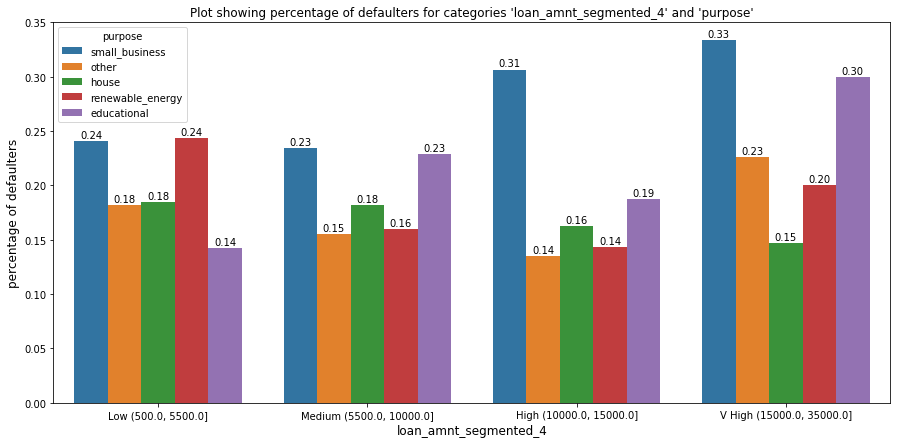

In [113]:
plt.figure(figsize=(15,7))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'purpose'")
plots = sns.barplot(data=loan_analysis_purpose_dataframe,x= "loan_amnt_segmented_4",y= "loan_status_quantified",hue="purpose",ci=None)
plt.xlabel("loan_amnt_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

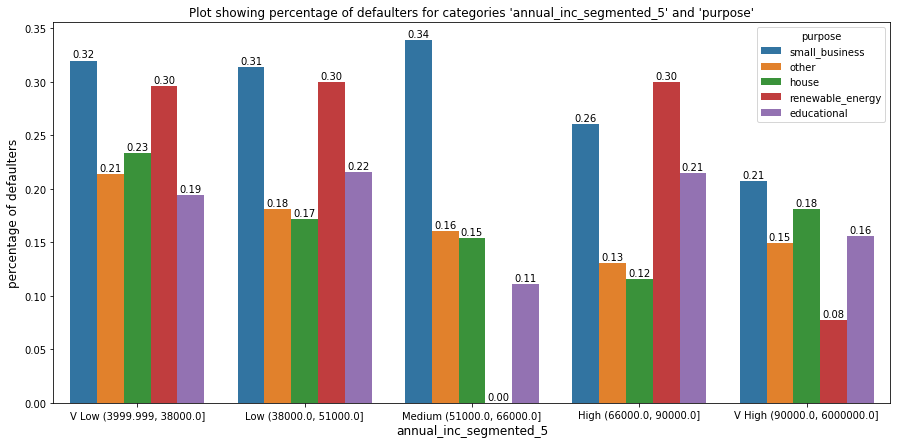

In [114]:
plt.figure(figsize=(15,7))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'purpose'")
plots = sns.barplot(data=loan_analysis_purpose_dataframe,x= "annual_inc_segmented_5",y= "loan_status_quantified",hue="purpose",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

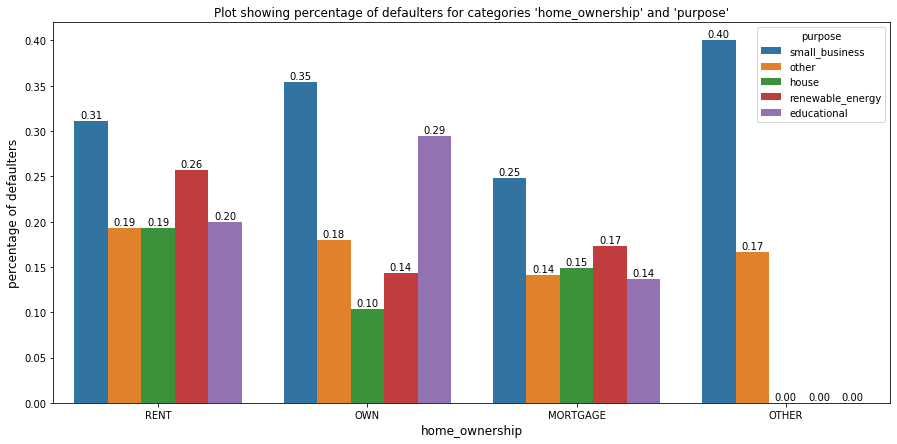

In [115]:
plt.figure(figsize=(15,7))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'purpose'")
plots = sns.barplot(data=loan_analysis_purpose_dataframe,x= "home_ownership",y= "loan_status_quantified",hue="purpose",ci=None)
plt.xlabel("home_ownership",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

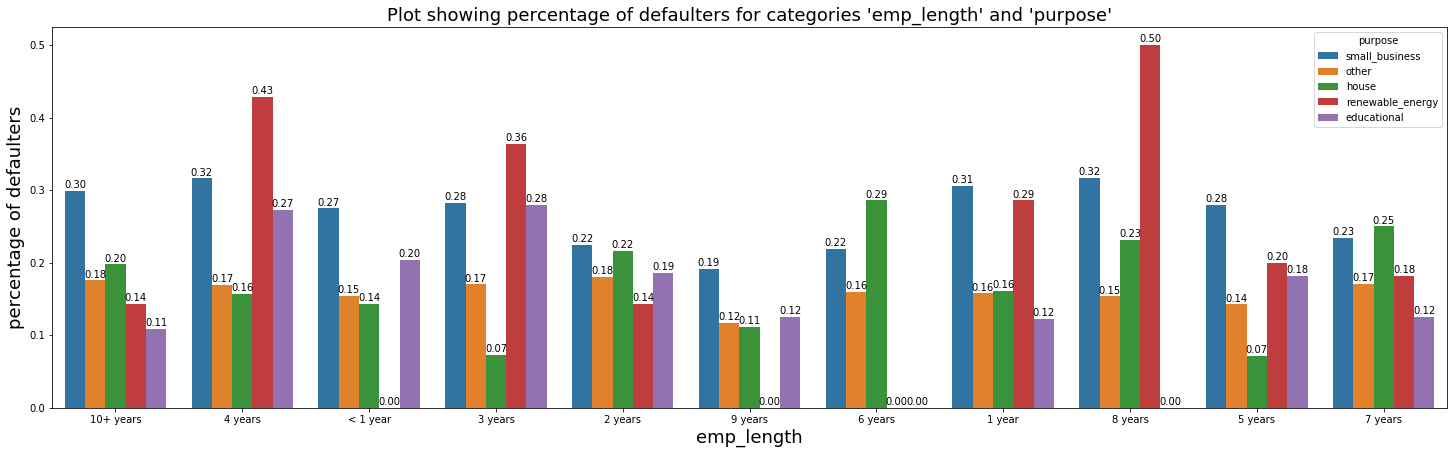

In [116]:
plt.figure(figsize=(25,7))
plt.title("Plot showing percentage of defaulters for categories 'emp_length' and 'purpose'",size=18)
plots = sns.barplot(data=loan_analysis_purpose_dataframe,x= "emp_length",y= "loan_status_quantified",hue="purpose",ci=None)
plt.xlabel("emp_length",size = 18)
plt.ylabel("percentage of defaulters",size = 18)
annotate(plots)
plt.show()

##### After analysing the above heatmaps for top 5 potential defaulters
##### Below are graphs which provide the information of few important combinations of driver variables

##### a.) Here we are analysing "pub_rec_bankruptcies" with other variables to gain the required insights

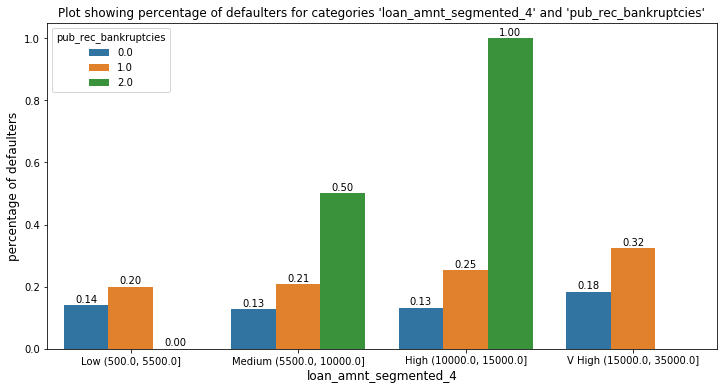

In [117]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'pub_rec_bankruptcies'")
plots = sns.barplot(data=loan_analysis,x="loan_amnt_segmented_4",y="loan_status_quantified",hue="pub_rec_bankruptcies",ci=None)
plt.xlabel("loan_amnt_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

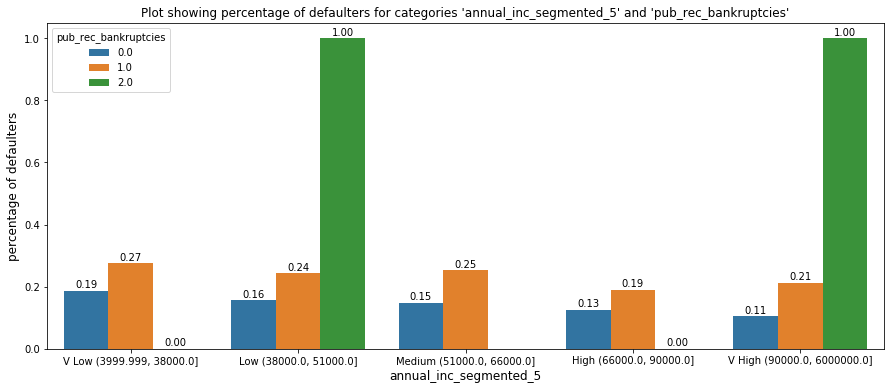

In [118]:
plt.figure(figsize=(15,6))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'pub_rec_bankruptcies'")
plots = sns.barplot(data=loan_analysis,x="annual_inc_segmented_5",y="loan_status_quantified",hue="pub_rec_bankruptcies",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

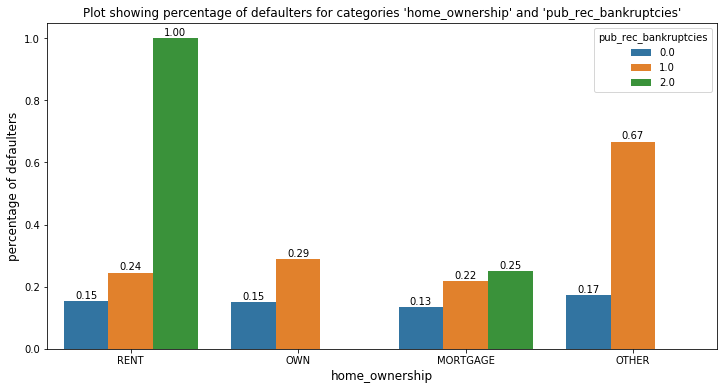

In [119]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'pub_rec_bankruptcies'")
plots = sns.barplot(data=loan_analysis,x="home_ownership",y="loan_status_quantified",hue="pub_rec_bankruptcies",ci=None)
plt.xlabel("home_ownership",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

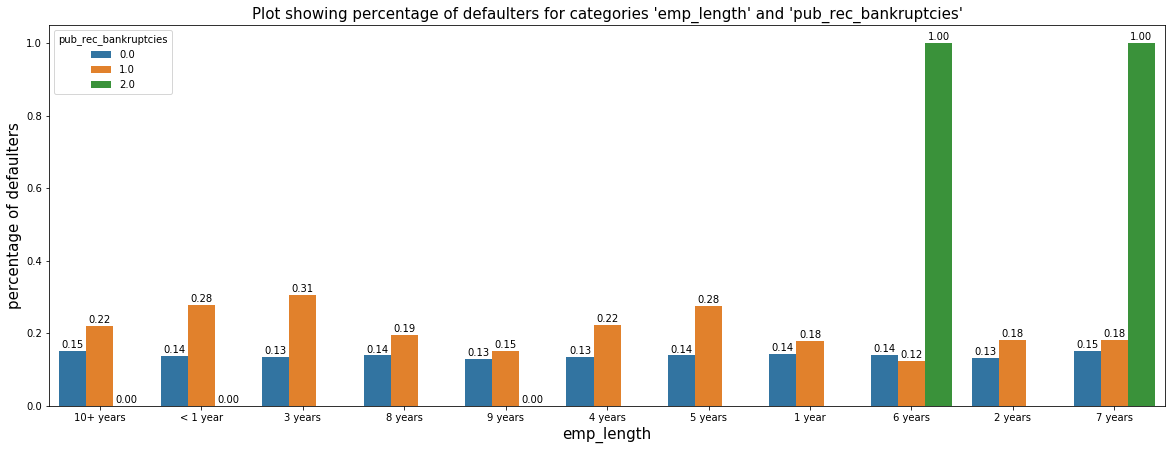

In [120]:
plt.figure(figsize=(20,7))
plt.title("Plot showing percentage of defaulters for categories 'emp_length' and 'pub_rec_bankruptcies'",size=15)
plots = sns.barplot(data=loan_analysis,x="emp_length",y="loan_status_quantified",hue="pub_rec_bankruptcies",ci=None)
plt.xlabel("emp_length",size = 15)
plt.ylabel("percentage of defaulters",size = 15)
annotate(plots)
plt.show()

##### b.) Here we are analysing "pub_rec" with other variables to gain the required insights

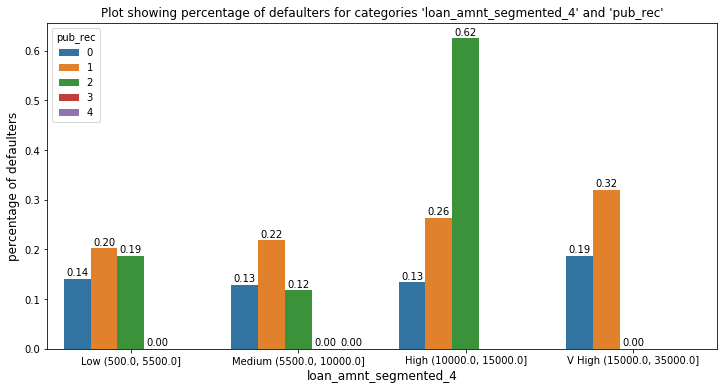

In [121]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'pub_rec'")
plots = sns.barplot(data=loan_analysis,x="loan_amnt_segmented_4",y="loan_status_quantified",hue="pub_rec",ci=None)
plt.xlabel("loan_amnt_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

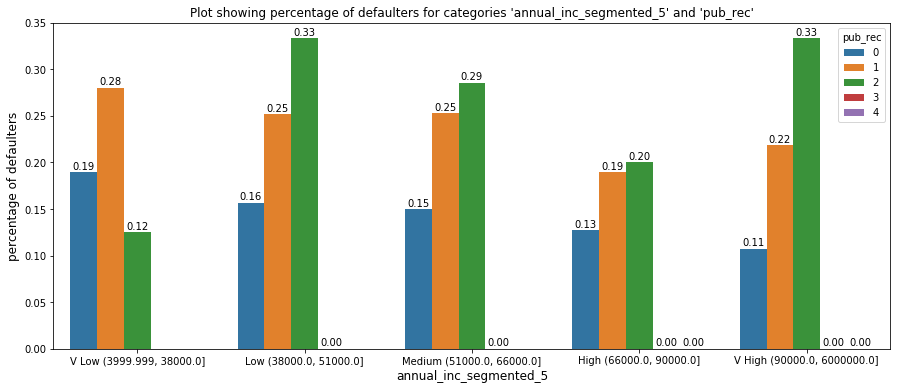

In [122]:
plt.figure(figsize=(15,6))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'pub_rec'")
plots = sns.barplot(data=loan_analysis,x="annual_inc_segmented_5",y="loan_status_quantified",hue="pub_rec",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

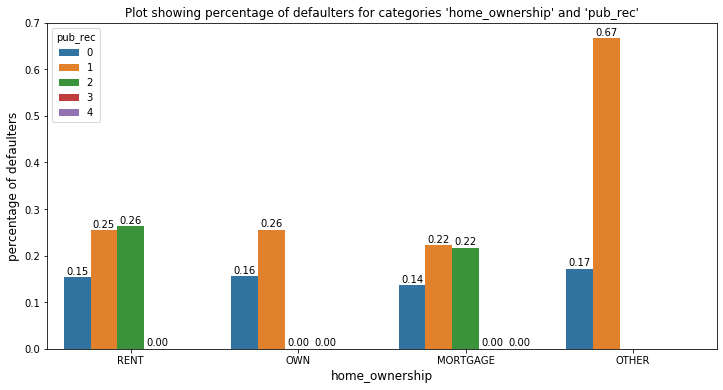

In [123]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'pub_rec'")
plots = sns.barplot(data=loan_analysis,x="home_ownership",y="loan_status_quantified",hue="pub_rec",ci=None)
plt.xlabel("home_ownership",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

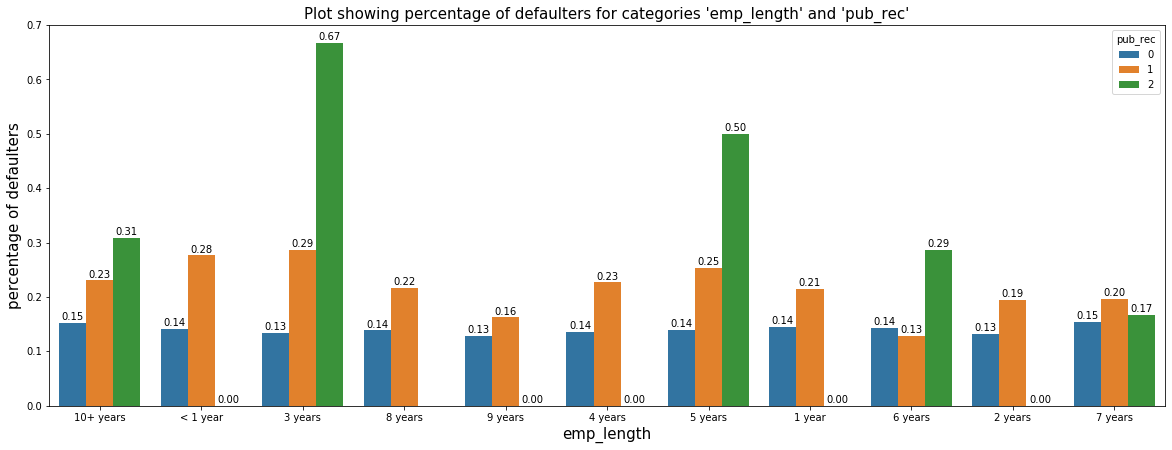

In [124]:
plt.figure(figsize=(20,7))
plt.title("Plot showing percentage of defaulters for categories 'emp_length' and 'pub_rec'",size=15)
plots = sns.barplot(data=loan_analysis,x="emp_length",y="loan_status_quantified",hue="pub_rec",hue_order=[0,1,2],ci=None)
plt.xlabel("emp_length",size = 15)
plt.ylabel("percentage of defaulters",size = 15)
annotate(plots)
plt.show()

##### c.) Here we are analysing "int_rate_segmented_4" with other variables to gain the required insights

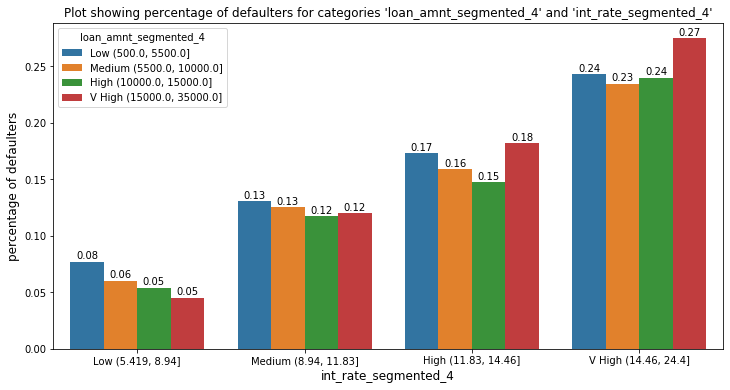

In [125]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'int_rate_segmented_4'")
plots = sns.barplot(data=loan_analysis,x="int_rate_segmented_4",y="loan_status_quantified",hue="loan_amnt_segmented_4",ci=None)
plt.xlabel("int_rate_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

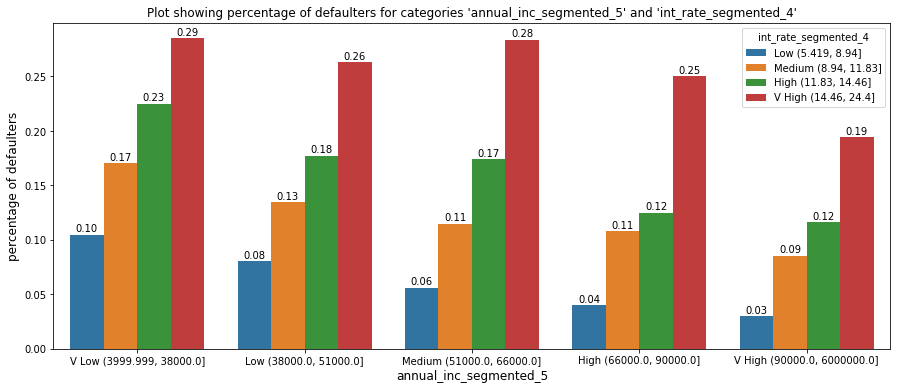

In [126]:
plt.figure(figsize=(15,6))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'int_rate_segmented_4'")
plots = sns.barplot(data=loan_analysis,x="annual_inc_segmented_5",y="loan_status_quantified",hue="int_rate_segmented_4",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

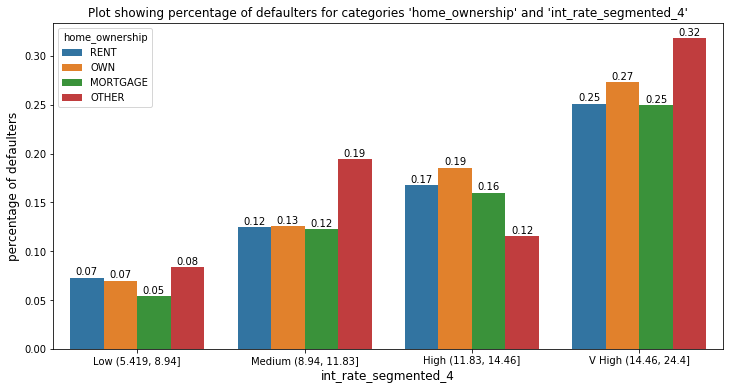

In [127]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'int_rate_segmented_4'")
plots = sns.barplot(data=loan_analysis,x="int_rate_segmented_4",y="loan_status_quantified",hue="home_ownership",ci=None)
plt.xlabel("int_rate_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

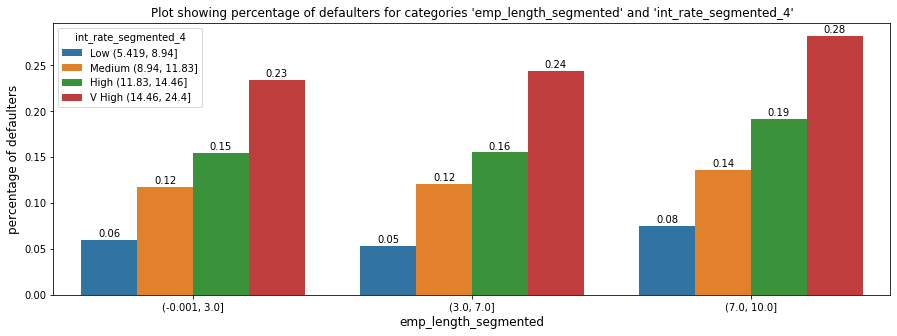

In [128]:
plt.figure(figsize=(15,5))
plt.title("Plot showing percentage of defaulters for categories 'emp_length_segmented' and 'int_rate_segmented_4'",size=12)
plots = sns.barplot(x=loan_analysis_emp_length.emp_length_type_int_segmented,y=loan_analysis.loan_status_quantified,hue=loan_analysis.int_rate_segmented_4,ci=None)
plt.xlabel("emp_length_segmented",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

##### d.) Here we are analysing "revol_util_segmented_5" with other variables to gain the required insights

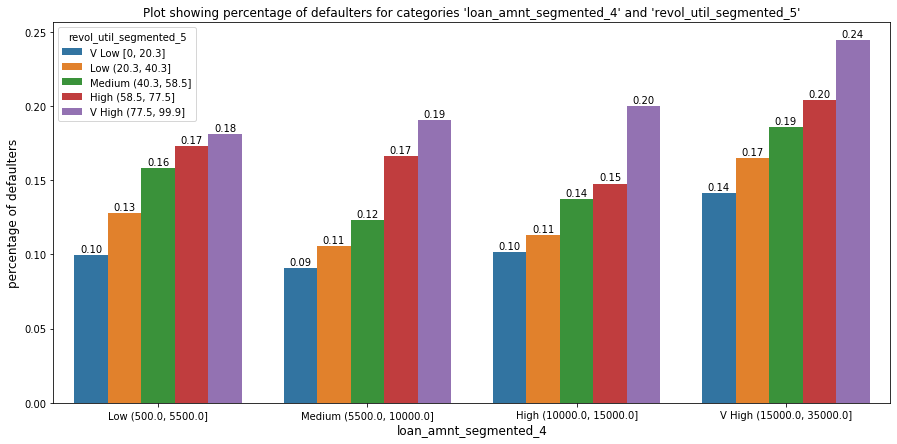

In [129]:
plt.figure(figsize=(15,7))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'revol_util_segmented_5'")
plots = sns.barplot(data=loan_analysis,x="loan_amnt_segmented_4",y="loan_status_quantified",hue="revol_util_segmented_5",ci=None)
plt.xlabel("loan_amnt_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

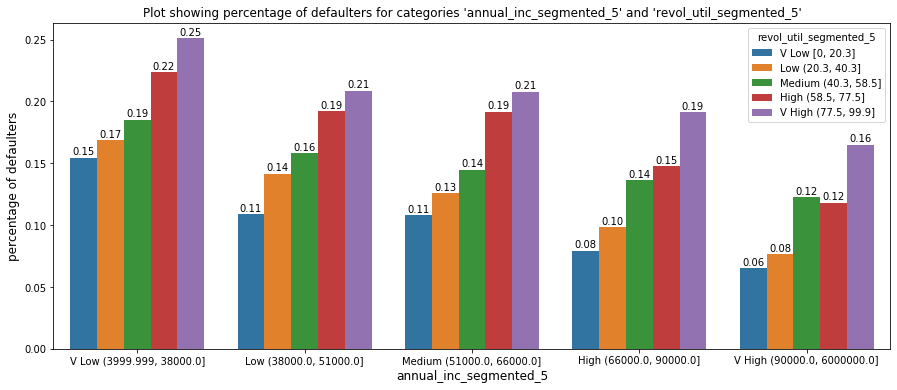

In [130]:
plt.figure(figsize=(15,6))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'revol_util_segmented_5'")
plots = sns.barplot(data=loan_analysis,x="annual_inc_segmented_5",y="loan_status_quantified",hue="revol_util_segmented_5",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

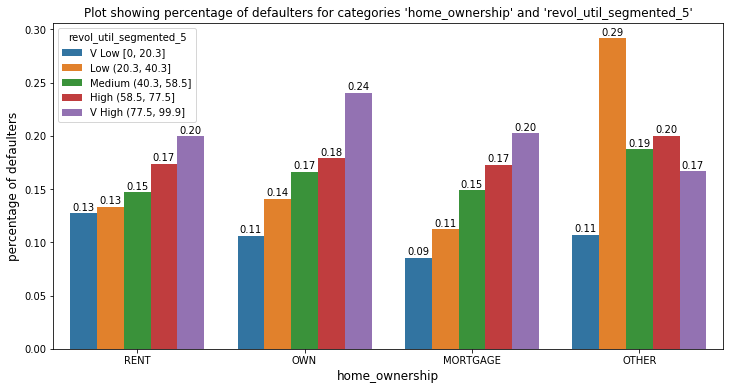

In [131]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'revol_util_segmented_5'")
plots = sns.barplot(data=loan_analysis,x="home_ownership",y="loan_status_quantified",hue="revol_util_segmented_5",ci=None)
plt.xlabel("home_ownership",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

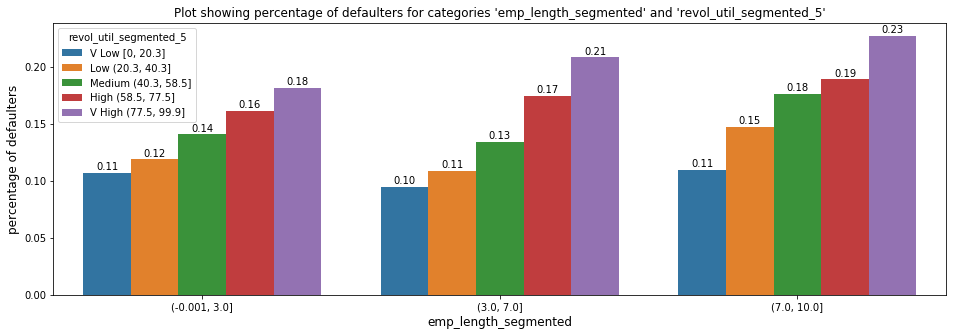

In [132]:
plt.figure(figsize=(16,5))
plt.title("Plot showing percentage of defaulters for categories 'emp_length_segmented' and 'revol_util_segmented_5'",size=12)
plots = sns.barplot(x=loan_analysis_emp_length.emp_length_type_int_segmented,y=loan_analysis.loan_status_quantified,hue=loan_analysis.revol_util_segmented_5,ci=None)
plt.xlabel("emp_length_segmented",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

##### e.) Here we are analysing "dti_segmented_5" with other variables to gain the required insights

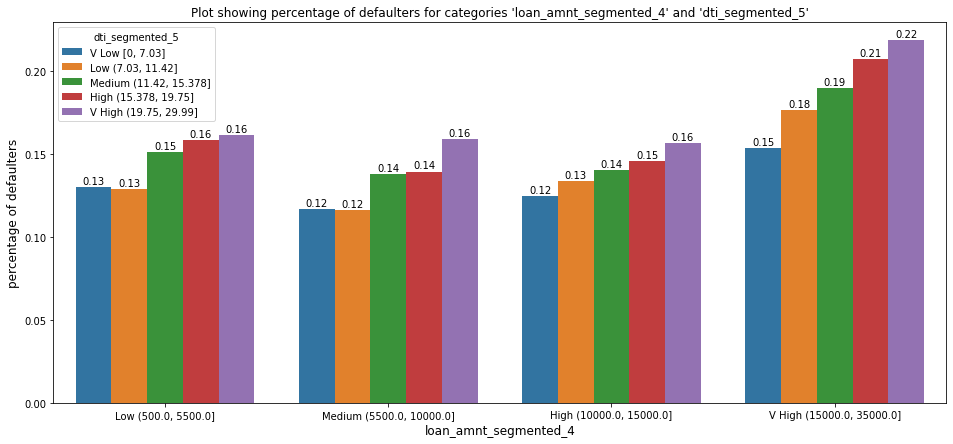

In [133]:
plt.figure(figsize=(16,7))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'dti_segmented_5'")
plots = sns.barplot(data=loan_analysis,x="loan_amnt_segmented_4",y="loan_status_quantified",hue="dti_segmented_5",ci=None)
plt.xlabel("loan_amnt_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

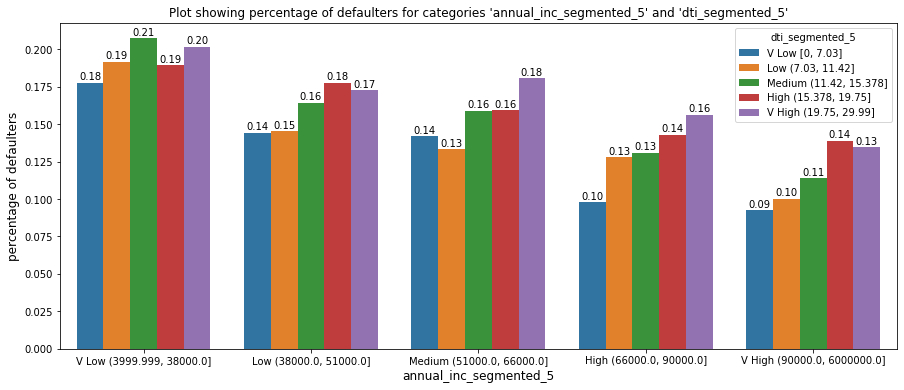

In [134]:
plt.figure(figsize=(15,6))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'dti_segmented_5'")
plots = sns.barplot(data=loan_analysis,x="annual_inc_segmented_5",y="loan_status_quantified",hue="dti_segmented_5",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

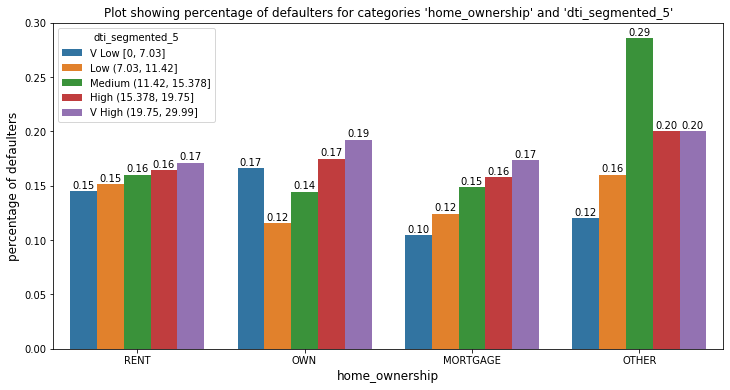

In [135]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'dti_segmented_5'")
plots = sns.barplot(data=loan_analysis,x="home_ownership",y="loan_status_quantified",hue="dti_segmented_5",ci=None)
plt.xlabel("home_ownership",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

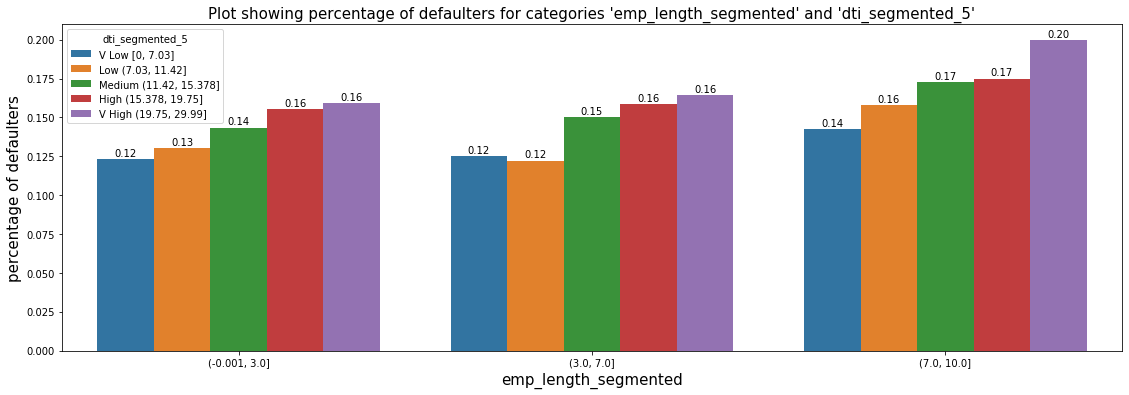

In [136]:
plt.figure(figsize=(19,6))
plt.title("Plot showing percentage of defaulters for categories 'emp_length_segmented' and 'dti_segmented_5'",size=15)
plots = sns.barplot(x=loan_analysis_emp_length.emp_length_type_int_segmented,y=loan_analysis.loan_status_quantified,hue=loan_analysis.dti_segmented_5,ci=None)
plt.xlabel("emp_length_segmented",size = 15)
plt.ylabel("percentage of defaulters",size = 15)
annotate(plots)
plt.show()

##### f.) Here we are analysing "verification_status" with other variables to gain the required insights

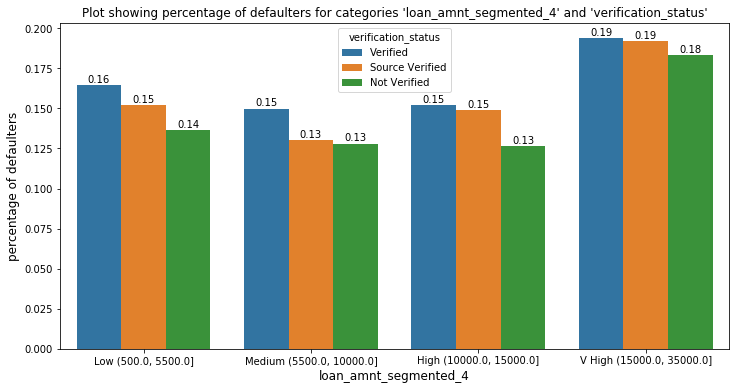

In [137]:
plt.figure(figsize=(12,6))
plt.title("Plot showing percentage of defaulters for categories 'loan_amnt_segmented_4' and 'verification_status'")
plots = sns.barplot(data=loan_analysis,x="loan_amnt_segmented_4",y="loan_status_quantified",hue="verification_status",ci=None)
plt.xlabel("loan_amnt_segmented_4",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

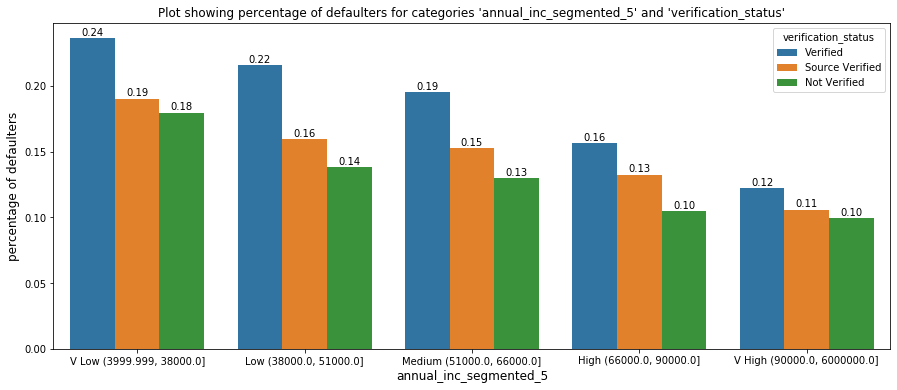

In [138]:
plt.figure(figsize=(15,6))
plt.title("Plot showing percentage of defaulters for categories 'annual_inc_segmented_5' and 'verification_status'")
plots = sns.barplot(data=loan_analysis,x="annual_inc_segmented_5",y="loan_status_quantified",hue="verification_status",ci=None)
plt.xlabel("annual_inc_segmented_5",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

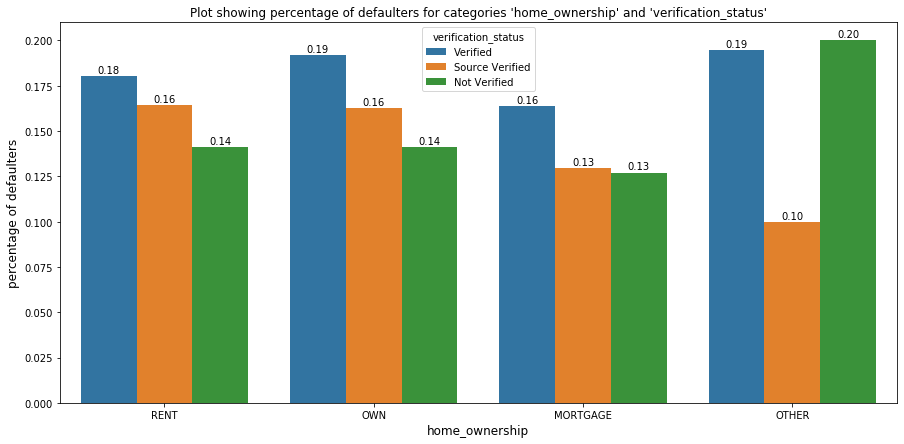

In [139]:
plt.figure(figsize=(15,7))
plt.title("Plot showing percentage of defaulters for categories 'home_ownership' and 'verification_status'")
plots = sns.barplot(data=loan_analysis,x="home_ownership",y="loan_status_quantified",hue="verification_status",ci=None)
plt.xlabel("home_ownership",size = 12)
plt.ylabel("percentage of defaulters",size = 12)
annotate(plots)
plt.show()

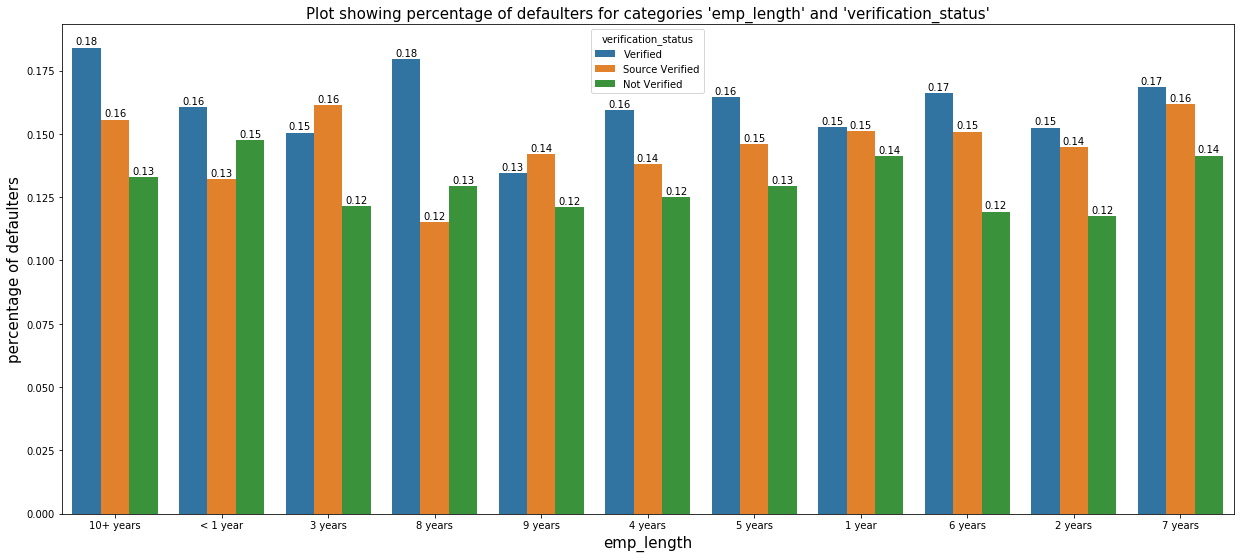

In [140]:
plt.figure(figsize=(21,9))
plt.title("Plot showing percentage of defaulters for categories 'emp_length' and 'verification_status'",size=15)
plots = sns.barplot(data=loan_analysis,x="emp_length",y="loan_status_quantified",hue="verification_status",ci=None)
plt.xlabel("emp_length",size = 15)
plt.ylabel("percentage of defaulters",size = 15)
annotate(plots)
plt.show()